##캐글러를 대상으로 한 설문조사

- 설문기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171 개 국가 및 지역에서 16,716 명의 응답자
- 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


## 데이터 파일

5 개의 데이터 파일을 제공

- schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
- multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
- conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
- RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [3]:
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import the standard python scientific libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# suppress deprecation and incorrect usage warings / warning 무시
import warnings
warnings.filterwarnings('ignore')



In [4]:
question = pd.read_csv('/content/schema.csv')
question.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [7]:
# 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [8]:
mcq.shape

(16716, 228)

In [9]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [10]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

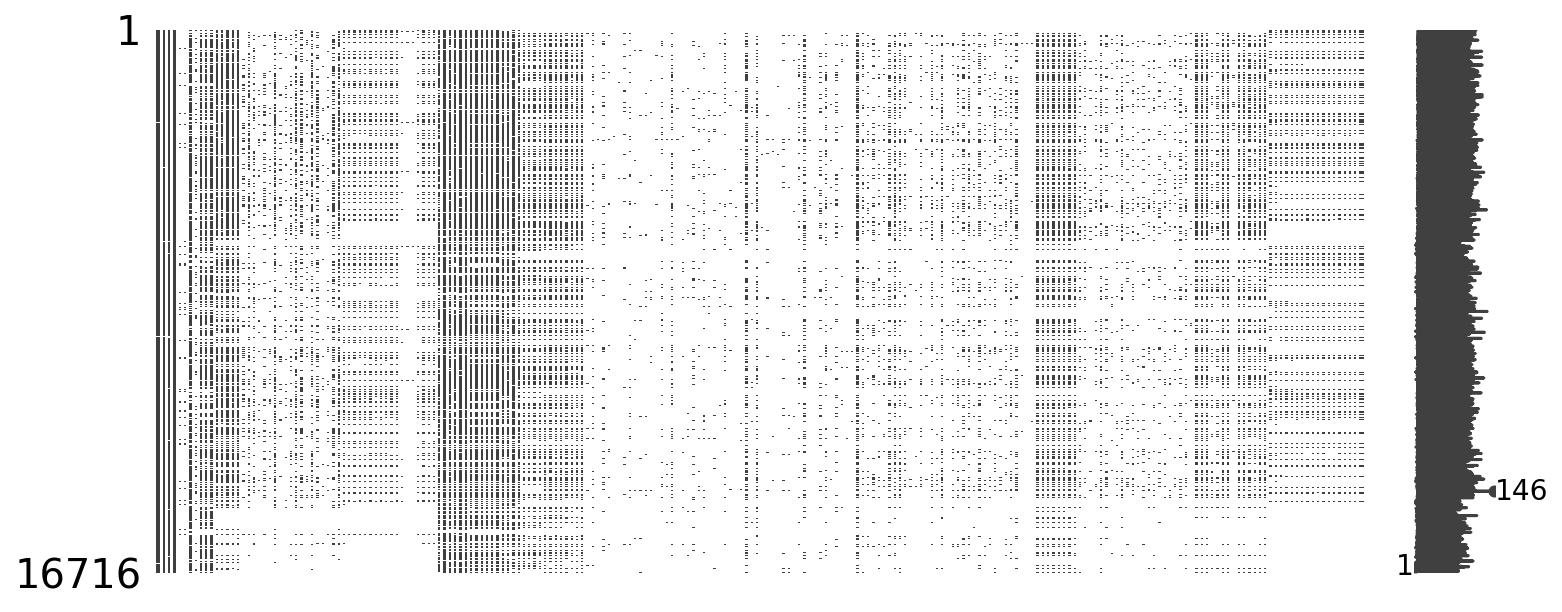

In [11]:
# missingno 는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프 만으로는 내용을 파악하기 힘들다.

import missingno as msno

msno.matrix(mcq, figsize=(12,5))

## 설문 통계

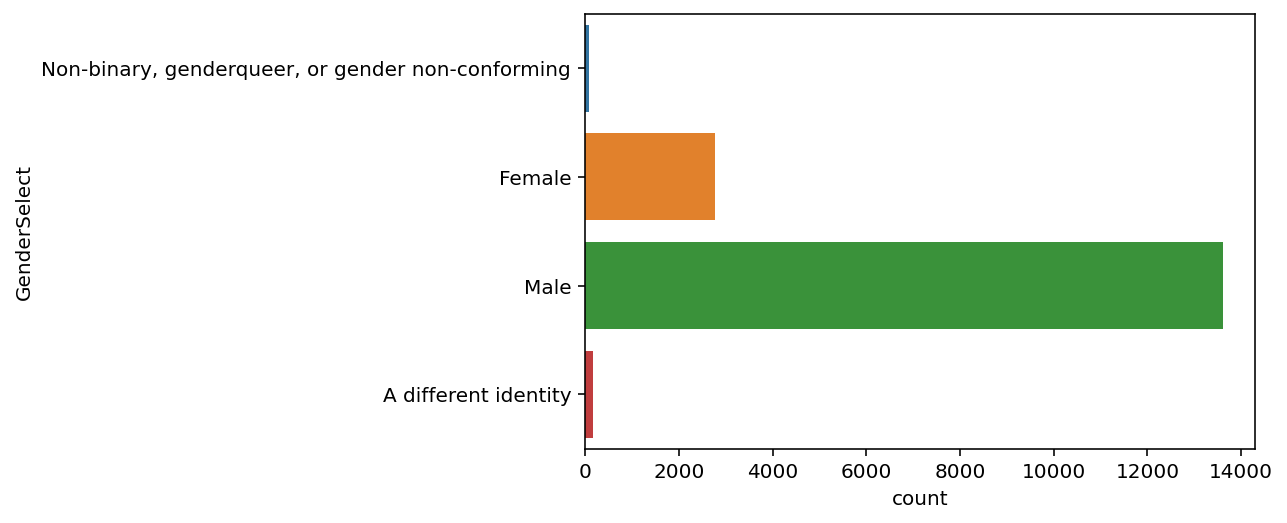

In [12]:
# 성별
sns.countplot(y='GenderSelect', data=mcq)
# mcq 데이터프레임에서 GenderSelect의 count 별 그래프를 나타냄
# 여성보다 남성의 설문 응답의 수가 더 많음

In [13]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df
# mcq의 country 컬럼의 value들의 counts를 세어 데이터프레임을 만들어준다,

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


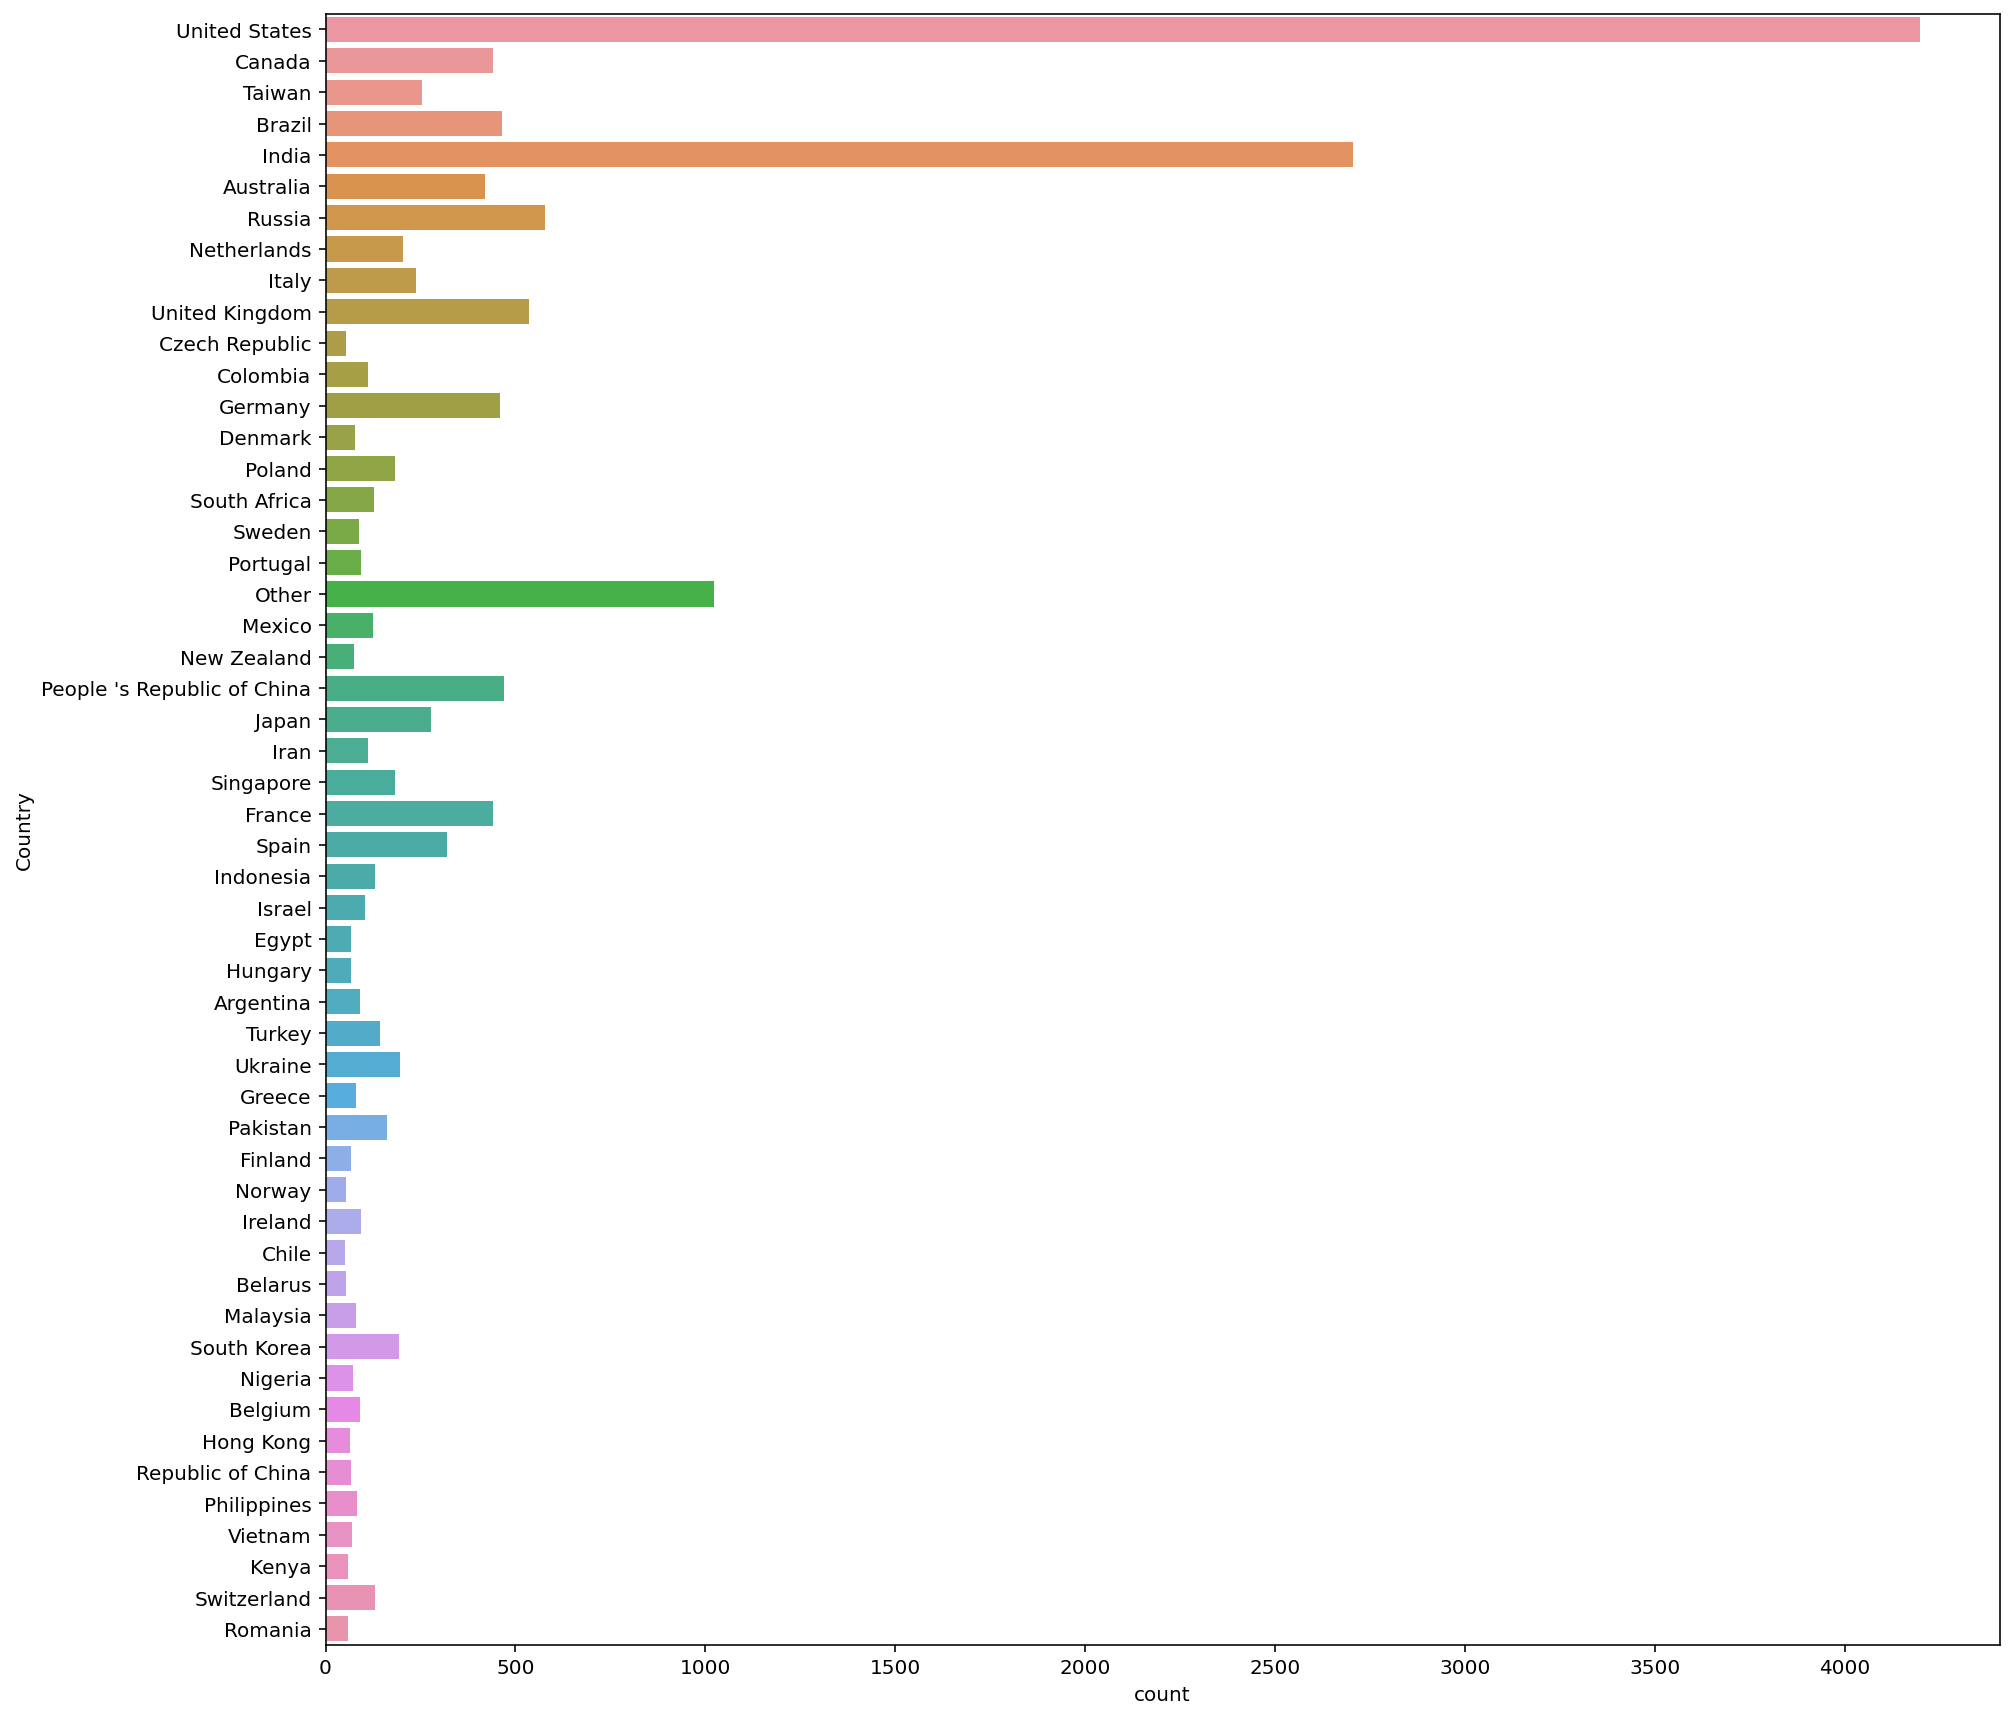

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(y='Country', data=mcq)

In [15]:
con_df['국가'] = con_df.index

con_df
# 국가 컬럼을 만들어줌

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [16]:
con_df.columns = ['응답 수', '국가']
con_df.head()
# 컬럼 명을 응답 수와 국가로 변경해줌

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom


In [17]:
# index 컬럼을 삭제하고 순위를 알기 위해서 reset_index()를 해준다.
# 우리나라는 18위이고 전체 52개국 중에서 20위까지만 확인한다.
con_df = con_df.reset_index().drop('index', axis=1)

con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [18]:
# Age 컬럼에 대한 정보를 본다. 
mcq['Age'].describe()

# 평균 연령, 최대, 최소 연령

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

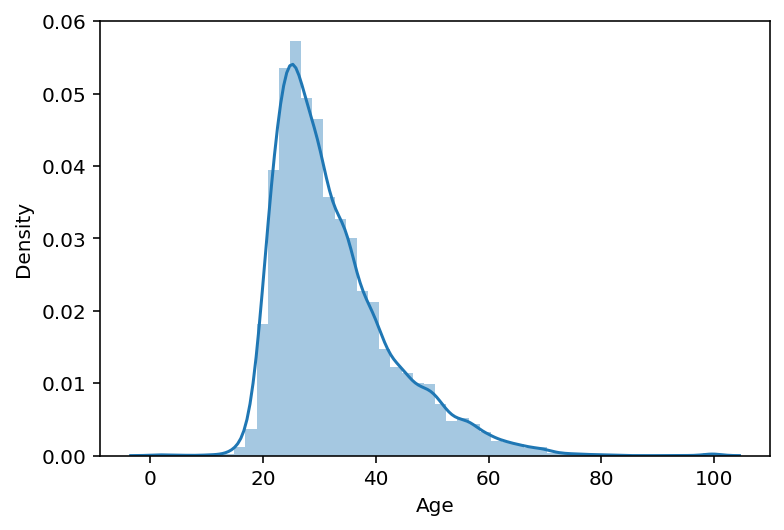

In [19]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

응답자의 대부분이 어리고, 20대부터 급격히 늘어나며 30대가 가장 많다.</br>
평균 나이는 32세이다.

##학력

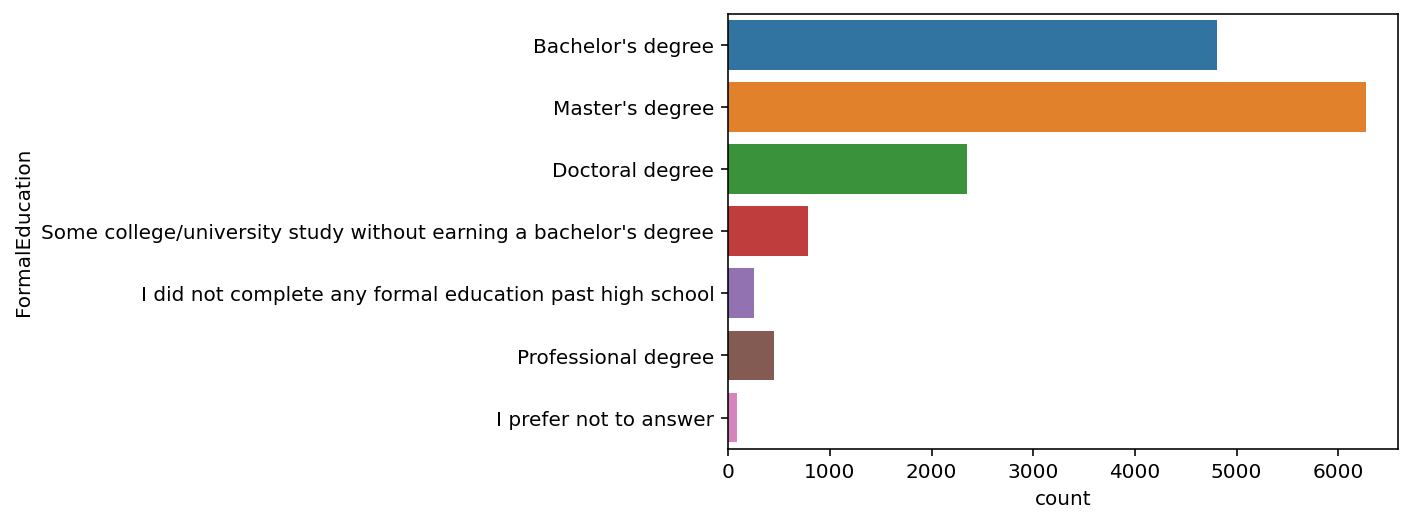

In [20]:
sns.countplot(y='FormalEducation', data=mcq)

응답자 중 master's degree(석사학위)가 가장 많았고 bachelor's degree(학사학위)가 그 뒤를 잇고 Doctoral degree(박사학위)가 세번째를 이었다.

##전공

In [21]:
pd.DataFrame(
    mcq['MajorSelect'].value_counts())


,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [22]:
# .value_counts()를 이용하면 그룹화 된 데이터의 count 값을 보여준다.
# namalize= True 옵션을 사용하면, 해당 데이터에서 어느정도의 비율을 차지하는지 알 수 있다.

mcq_major_count = pd.DataFrame(
    mcq['MajorSelect'].value_counts()
)

mcq_major_percent = pd.DataFrame(
    mcq['MajorSelect'].value_counts(normalize=True)
)

mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index= True, right_index= True
)
mcq_major_df.columns = ['응답 수', '비율']


In [23]:
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


컴퓨터 과학 전공자들이 33%를 차지할 정도로 많고 수리통계, 공학. 전기 공학자들이 뒤를 이었다.

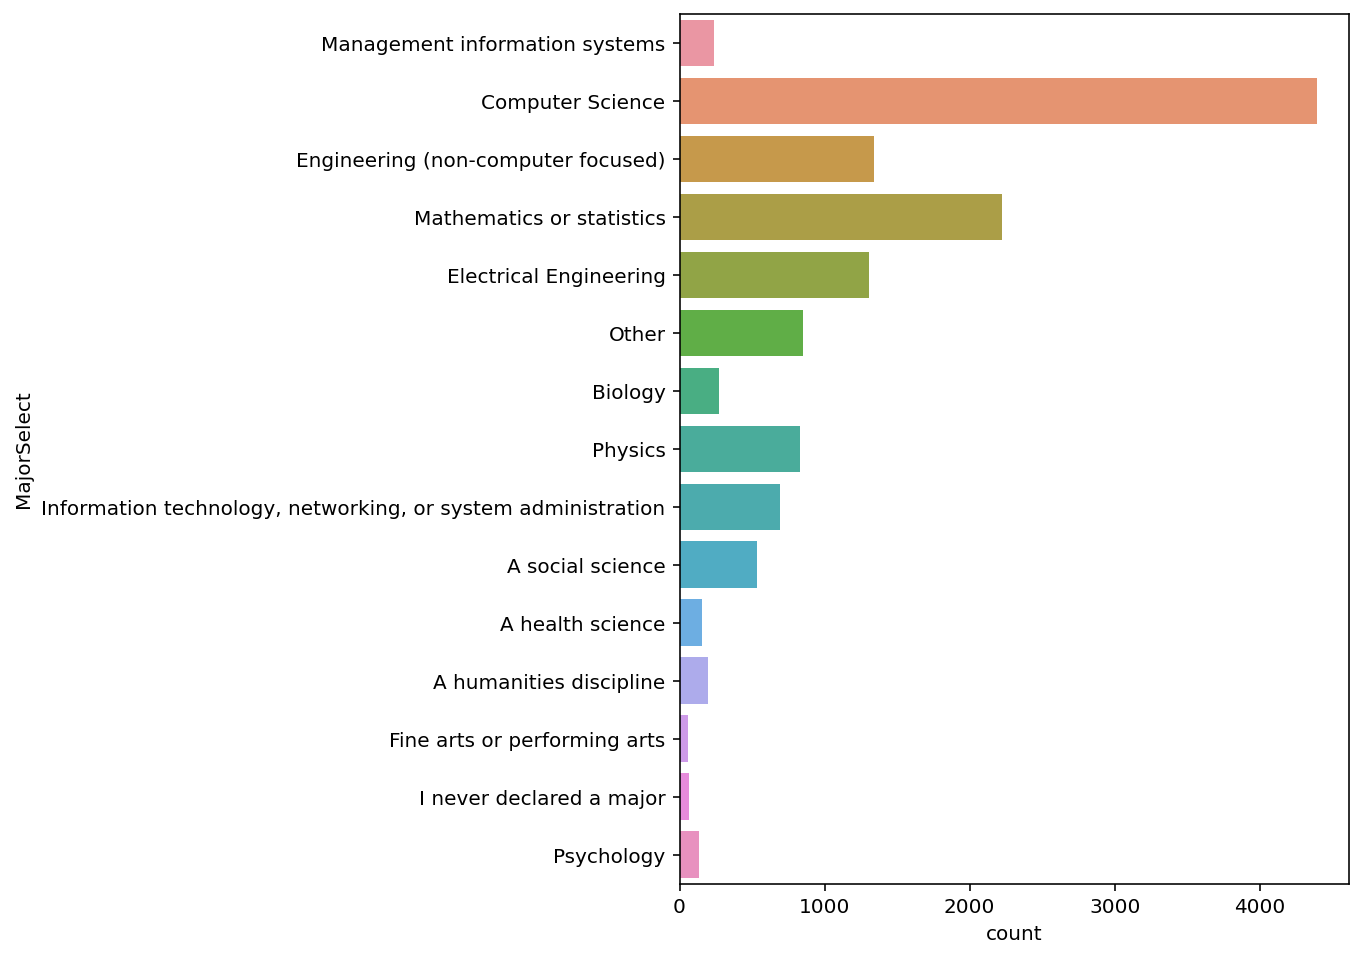

In [24]:
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업여부

In [25]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts()
)
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True)
)
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True
)
mcq_es_df.columns = ['응답 수', '비율']

In [26]:
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


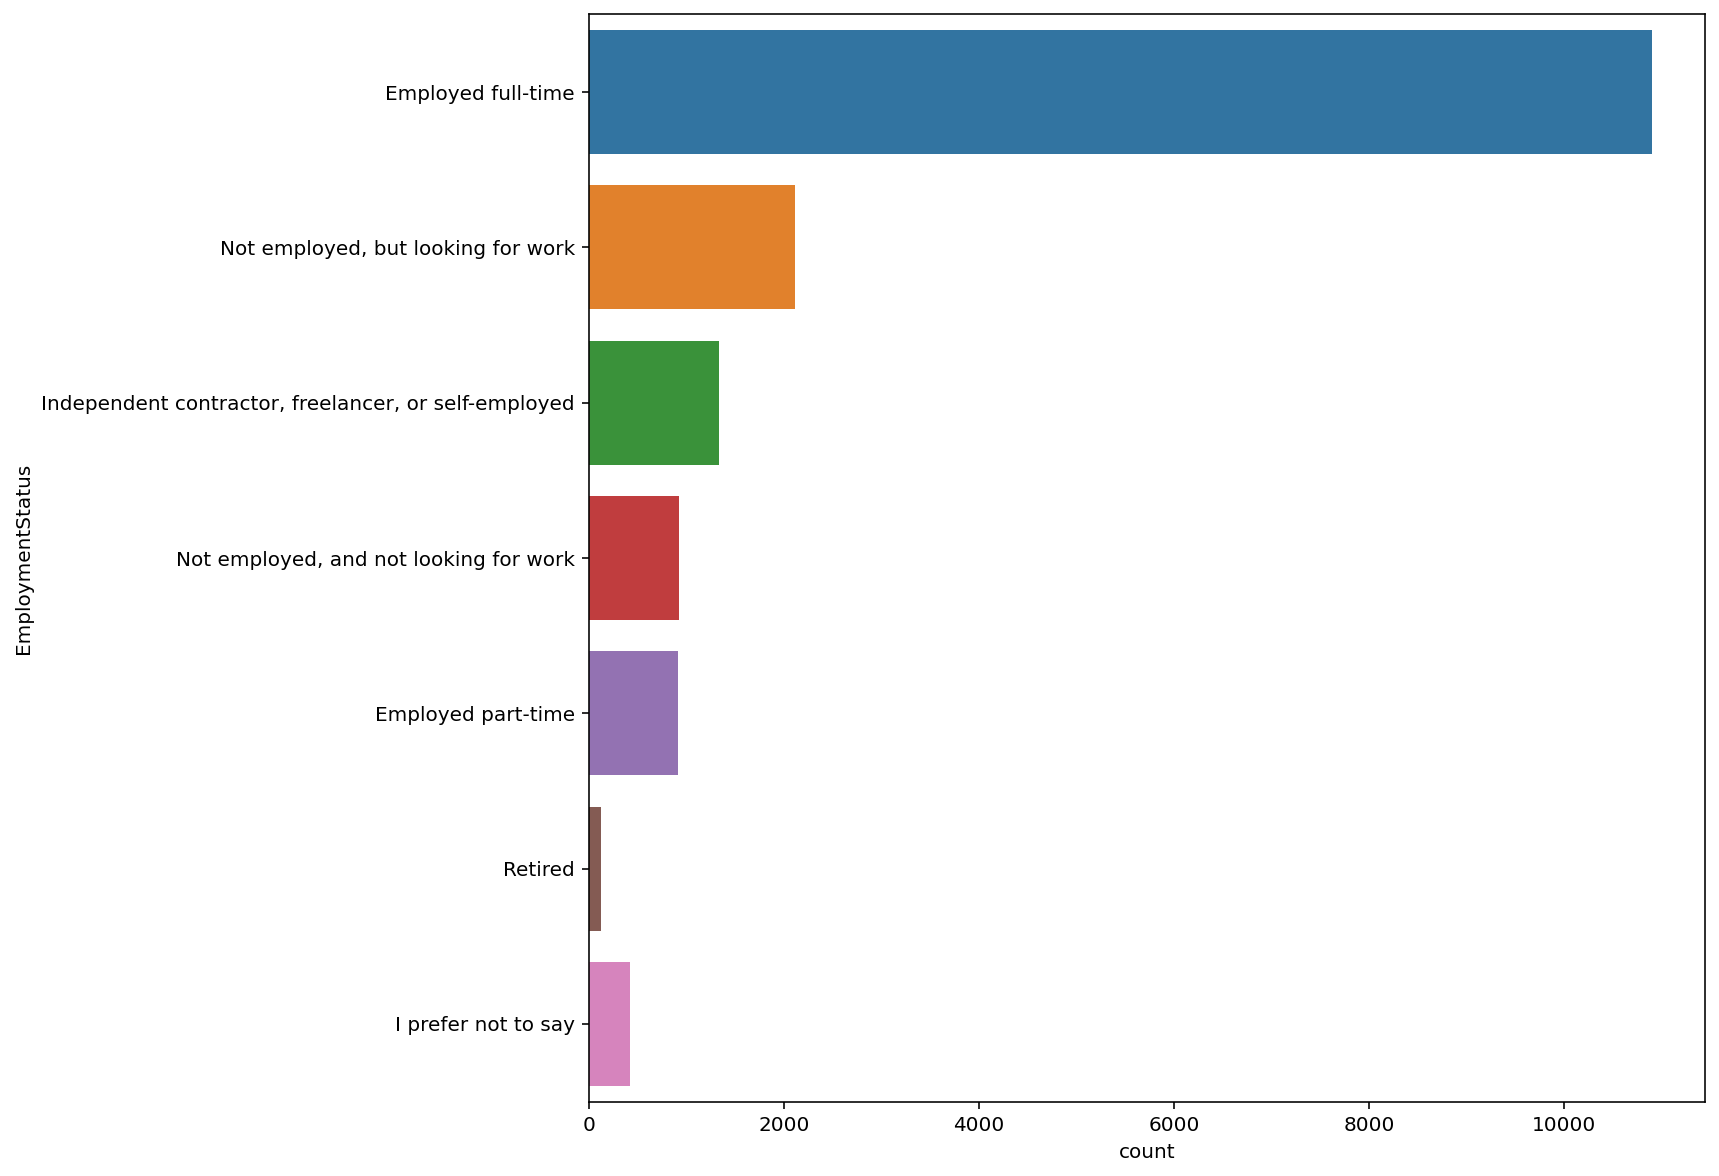

In [27]:
plt.figure(figsize=(10, 10))
sns.countplot(y='EmploymentStatus', data=mcq)

Employed full-time가 65% 를 차지할 정도로 가장 많았고 Not employed, but looking for work가 그 뒤로 가장 많았다.

## 프로그래밍 경험

'Tenure'항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다.</br>



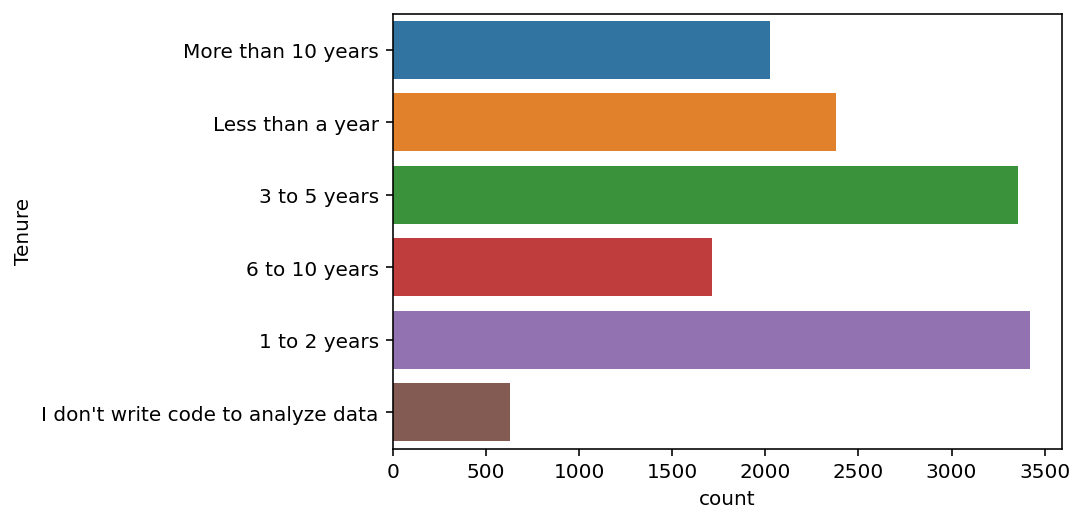

In [28]:
sns.countplot(y='Tenure', data=mcq)

특히 1 ~ 2년의 경험을 가진 사람들이 많았고 그 뒤로 3 ~ 5년의 경험을 가진 사람들이 많았다.

## 한국

The number of interviewees in Korea is 194


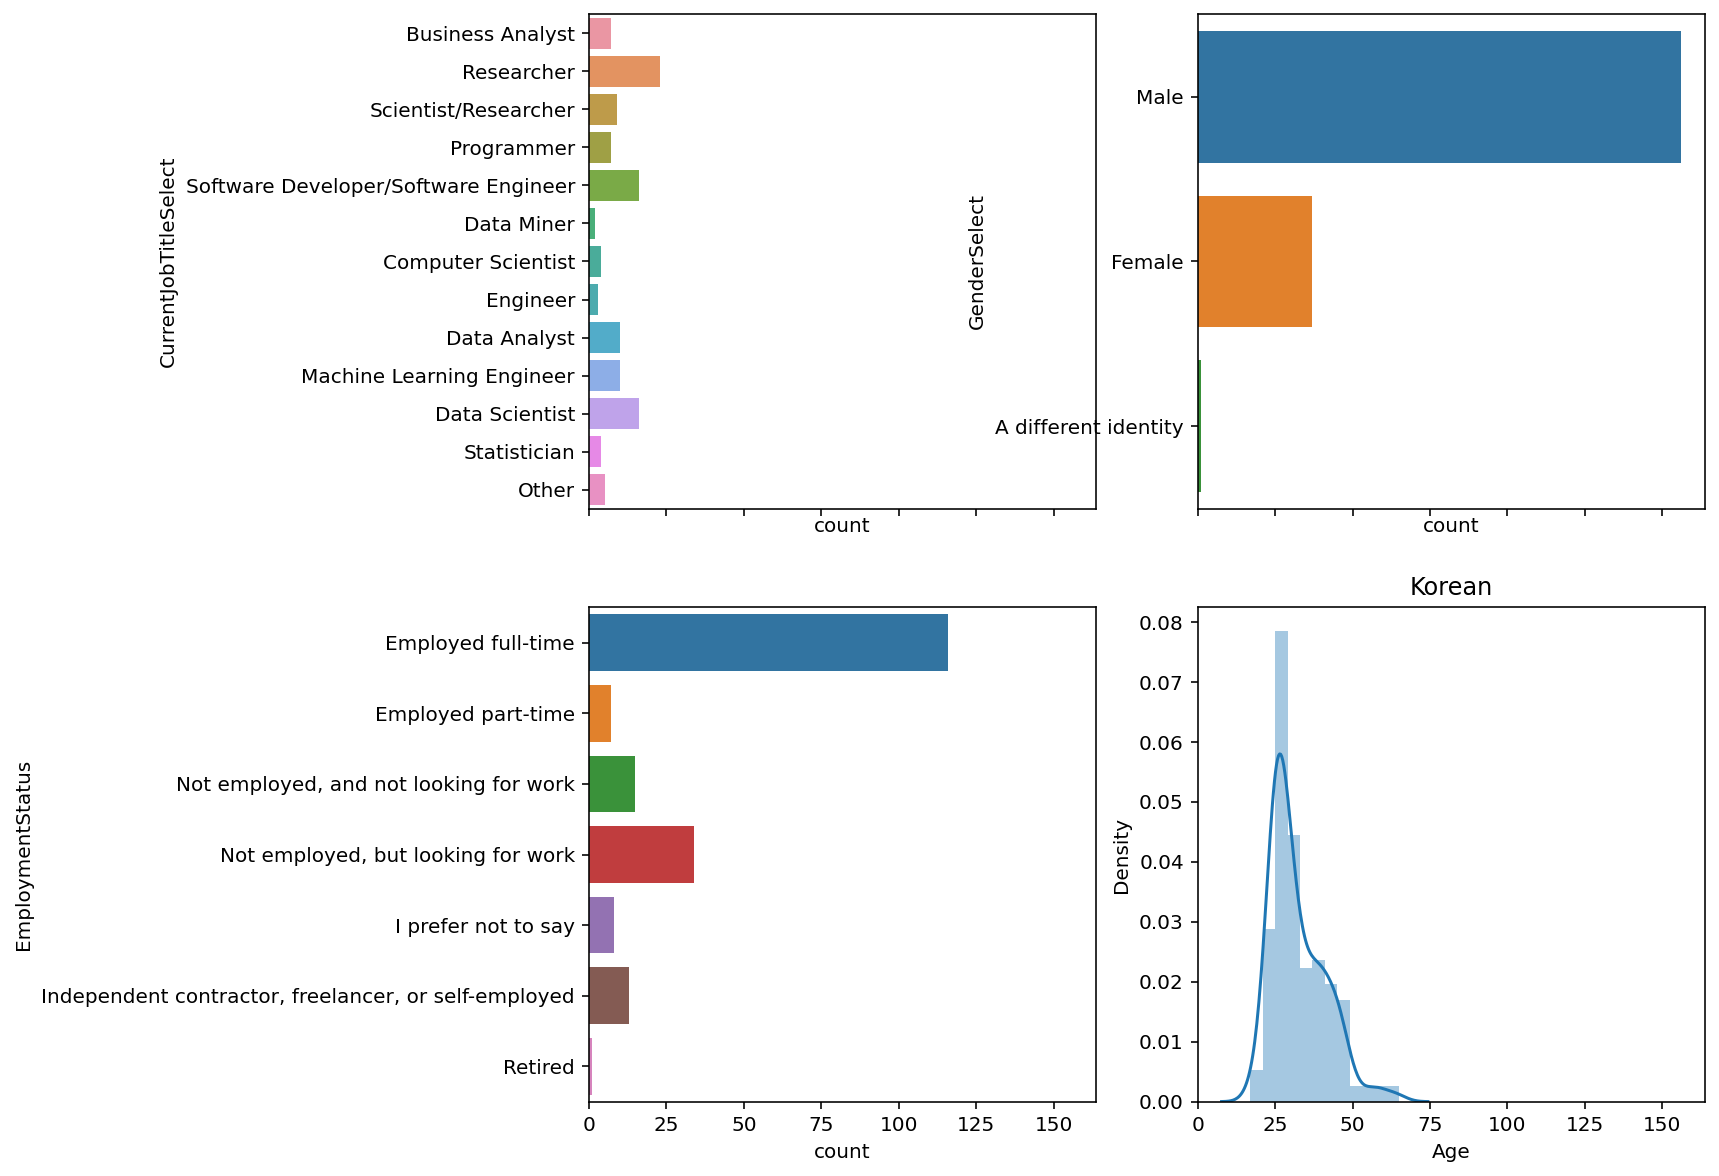

In [29]:
korea = mcq.loc[mcq['Country'] == 'South Korea']

print('The number of interviewees in Korea is', str(korea.shape[0]))


f,axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.countplot(y='GenderSelect', data=korea, ax=axes[0,1])
sns.countplot(y='EmploymentStatus', data=korea, ax=axes[1,0])
sns.countplot(y='CurrentJobTitleSelect', data=korea, ax=axes[0,0])
sns.distplot(korea['Age'].dropna(), ax=axes[1,1])
plt.title('Korean')
plt.show()

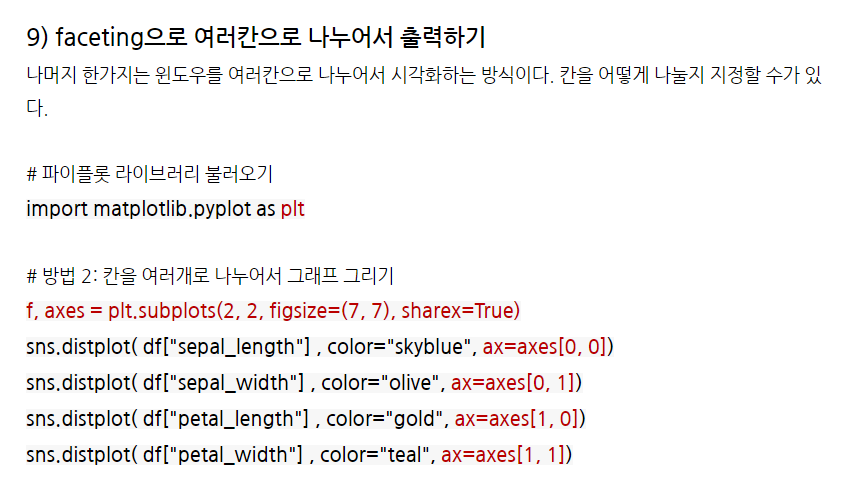

Text(0.5, 1.0, 'Korean male')

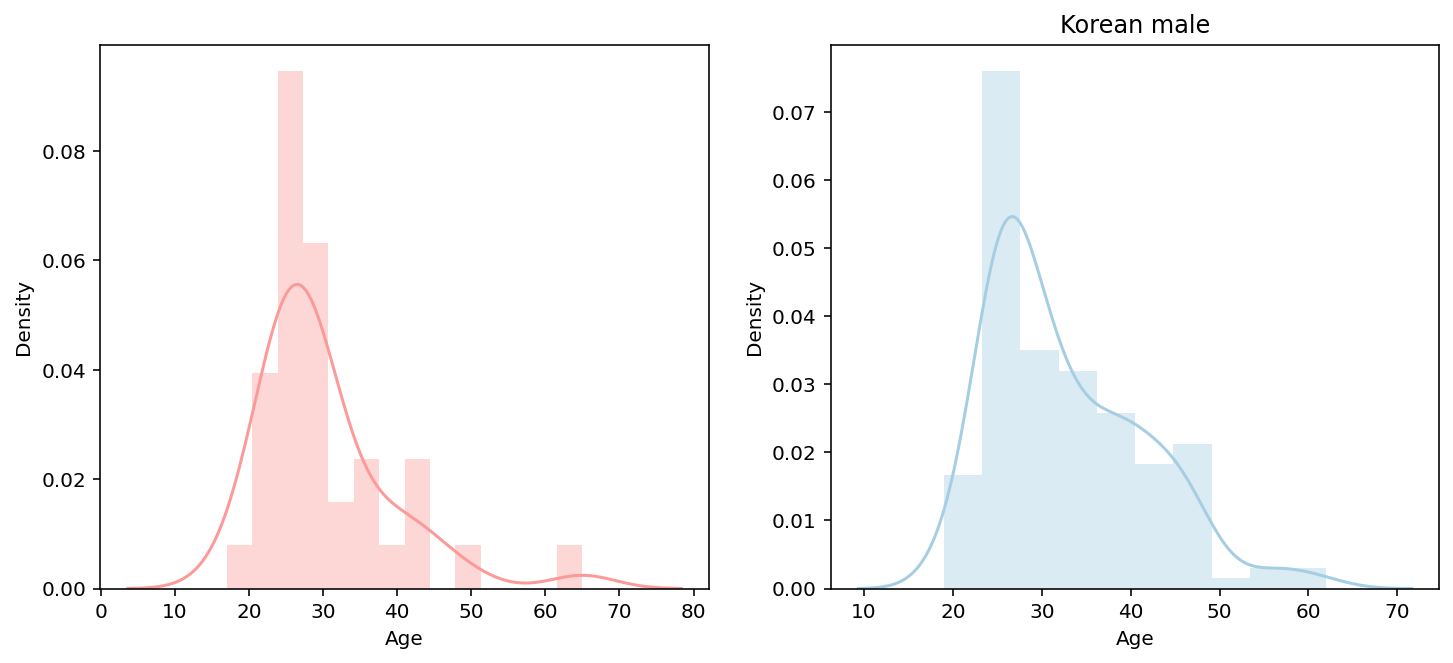

In [30]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12, 5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[4], ax= ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color= sns.color_palette('Paired')[0], ax= ax2)
plt.title('Korean male')

# korea 데이터 프레임에서 age 컬럼을 뽑고 GenderSelect가 male or female인 행들만 추출한다.


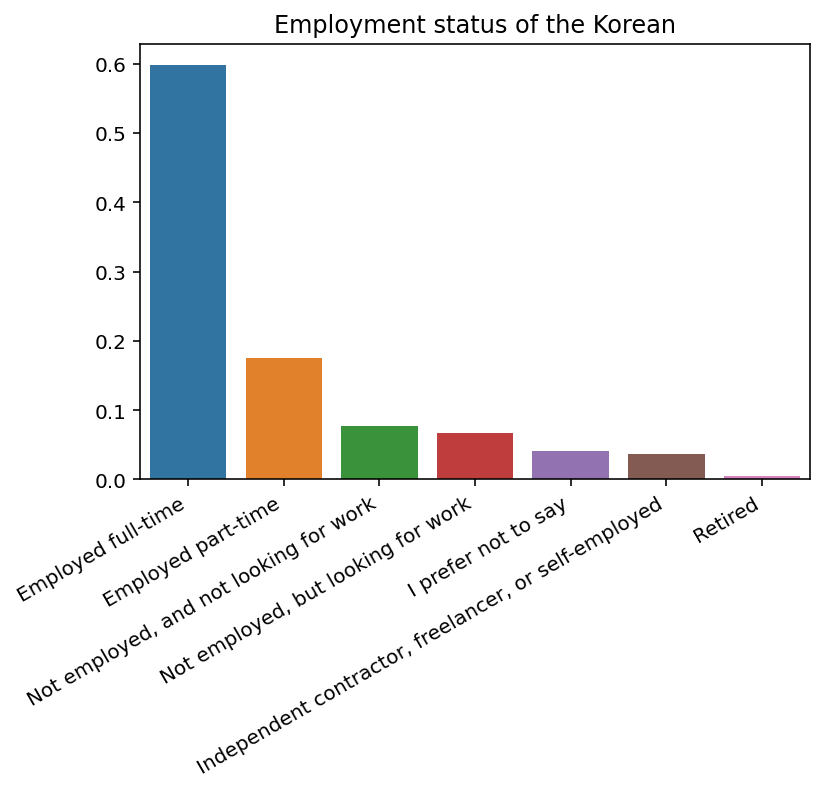

In [31]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

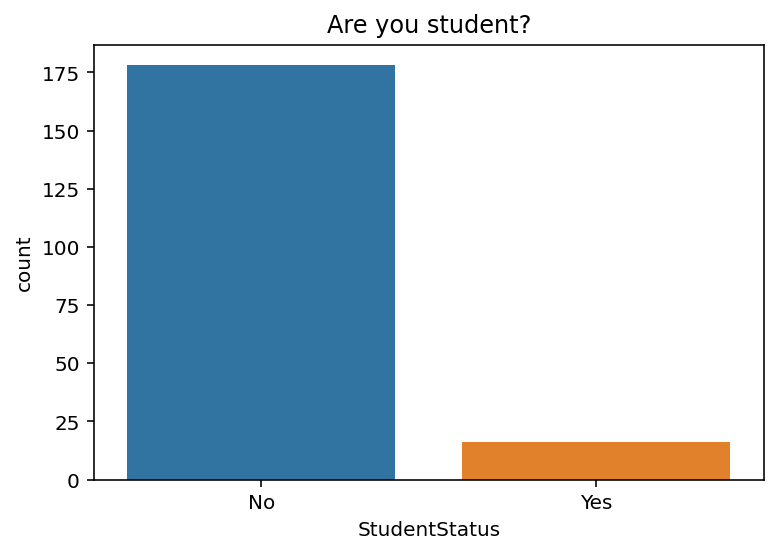

In [32]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('Are you student?')
plt.show()


In [33]:
full_time = mcq.loc[mcq['EmploymentStatus'] == 'Employed full-time']
print(full_time.shape)

look_for_job = mcq.loc[mcq['EmploymentStatus'] == 'Not employed, but looking for work']
print(look_for_job.shape)

(10897, 228)
(2110, 228)


자주 묻는 질문 FAQ
- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# Q1. python과 R 중에서 어떤 언어를 배워야 할까요?

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [35]:
question = pd.read_csv('/content/schema.csv')
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [36]:
question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [37]:
mcq = pd.read_csv('/content/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

In [38]:
mcq.shape

(16716, 228)

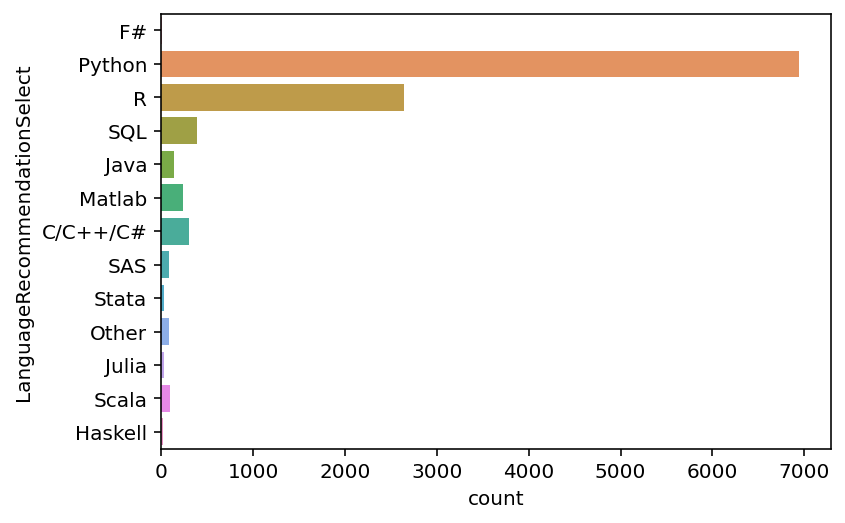

In [39]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있음을 알 수 있음

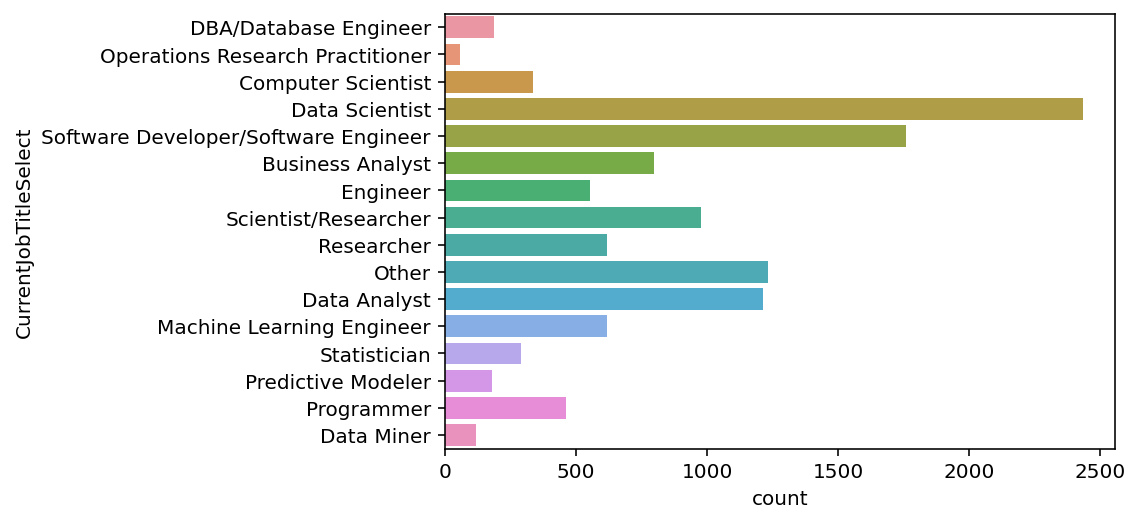

In [40]:
# 현재 하고 있는 일

sns.countplot(y='CurrentJobTitleSelect', data=mcq)

data scientist가 가장 많고 그 뒤로 software developer와 data analyst가 뒤를 잇는다.

In [41]:
# 현재 하고 있는 일에 대한 전체 응답수

mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape


# mcq[mcq['CurrentJobTitleSelect'].notnull()] 은 CurrentJobTitleSelect에서 null값이 없는 값들만 가져온다.
# mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape 를 붙여주어 null값이 없는 CurrentJobTitleSelect의 shape을 도출한다.

(11830,)

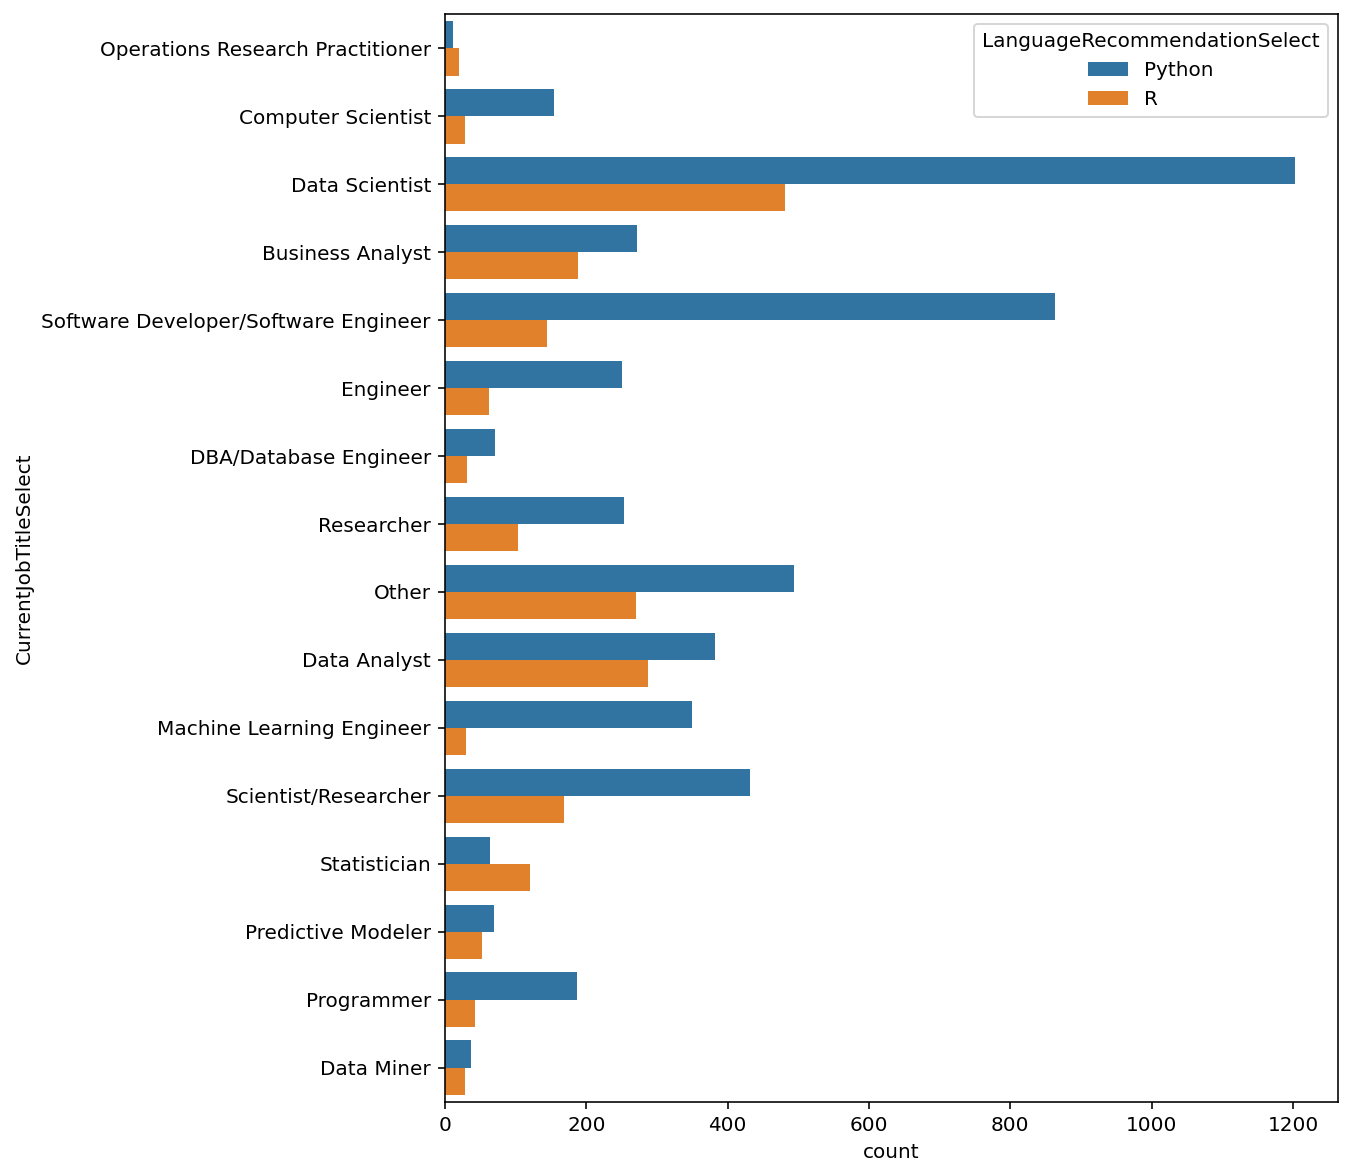

In [42]:
# 현재 하고있는 일에 대한 응답을 해준 사람 중 python과 r을 사용하는 사람 알아보기
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는 지 알아볼 수 있다.

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & 
           ((mcq['LanguageRecommendationSelect'] == 'Python') |
           (mcq['LanguageRecommendationSelect'] == 'R'))]

# mcq['CurrentJobTitleSelect'].notnull() = CurrentJobTitleSelect에서 널값이 없는 값만 추출하고 그 중에서
# (mcq['LanguageRecommendationSelect'] == 'Python') | (mcq['LanguageRecommendationSelect'] == 'R') - LanguageRecommendationSelect에서 파이썬 또는 R 값을 추출

data.shape

plt.figure(figsize=(8, 10))

sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)
# hue 옵션을 사용하여 파이썬과 r을 구분지어 보여준다.

현재 하고 있는 일 응답자 중에서 data scientist들은 python을 압도적으로 많이 사용한다. </br>
대부분의 직업에서 python이 많이 사용되며 통계학자의 경우 R이 더 많이 사용된다.

# Q2 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
- 관련 분야 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고있다.
- 응답자들이 내년에 가장 흥미로운 기술이 될 것이라고 응답한 것이다.

### 데이터 사이언스 툴

In [43]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())

mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))

mcq_ml_tool_df = mcq_ml_tool_count.merge(
    mcq_ml_tool_percent, left_index=True, right_index=True).head(20)

mcq_ml_tool_df.columns = ['응답 수', '비율']

mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


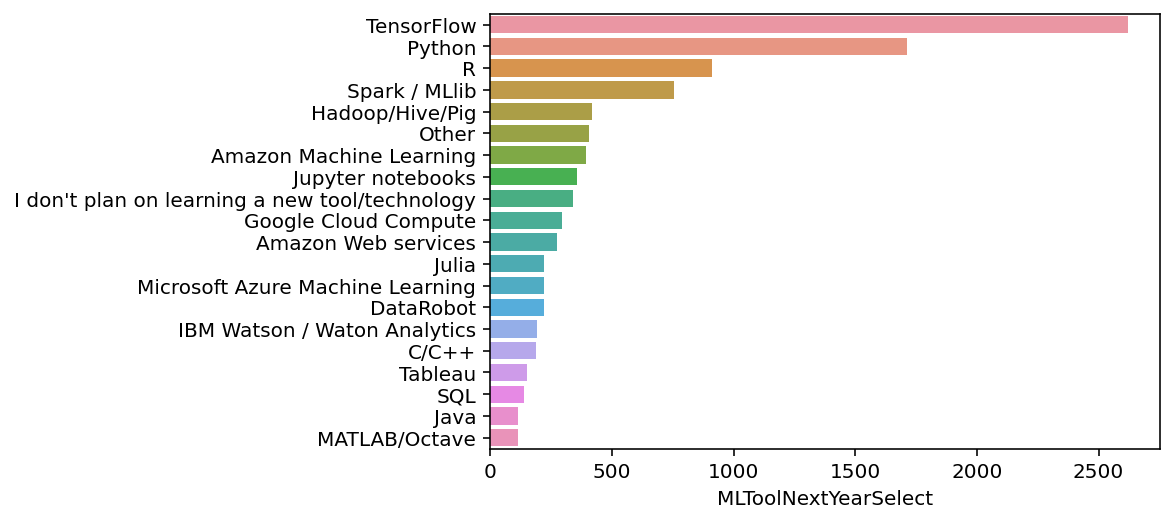

In [44]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)

sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크인 Tensorflow가 23%로 가장 많은 관심을 받을 것이라고 예상함 </br>
그 뒤로 python과 r이 뒤를 이었다.

## 다음 해에 주목할 만한 Data Science Methods

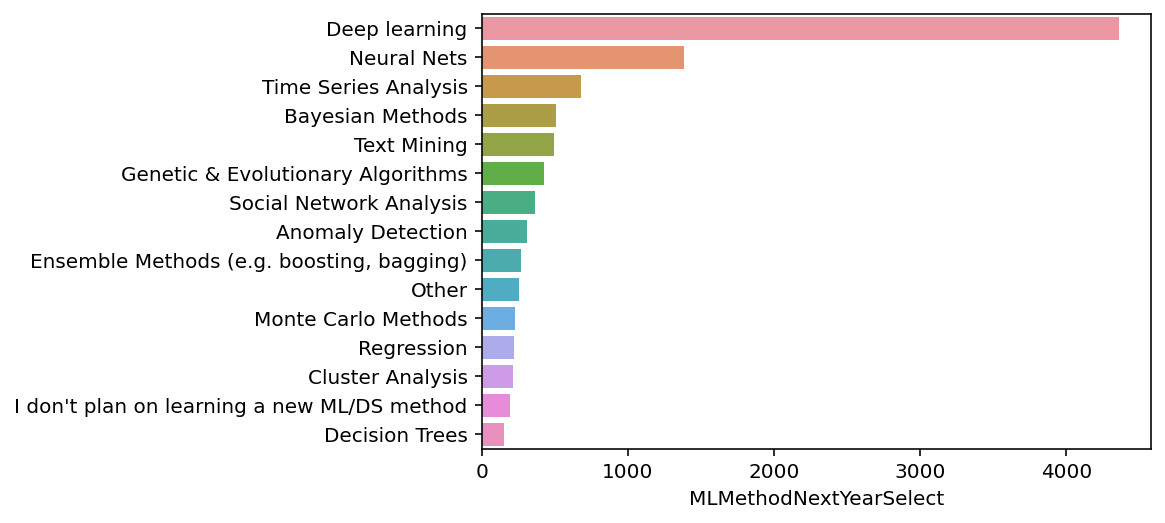

In [45]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)

data

sns.barplot(y=data.index, x=data)

다음 해에 Deep Learning이 가장 주목할 만하고 그 뒤로 신경망, 시계열분석, 베이지안, 텍스트 마이닝 등이 주목할 만하다고 답했다. 

#Q3 어딩서 데이터 사이언스를 배워야 할까요?

In [46]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
# mcq['LearningPlatformSelect'] 의 타입을 str로 바꾸고 apply(lambda x: x.split(',')) 를 이용하여 콤마를 기준으로 구분지었다.

s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

s.name = 'platform'


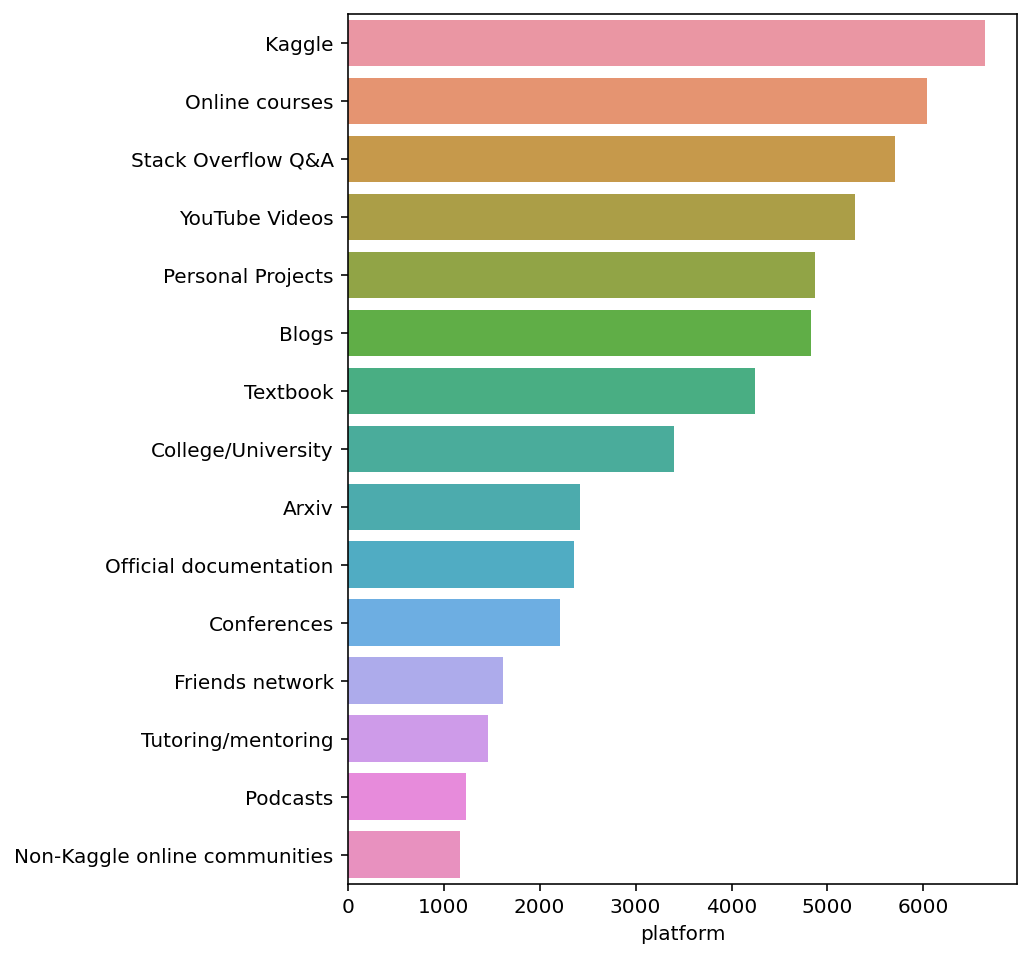

In [47]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [48]:
# 설문내용과 누구에게 물어봤는지 알아보기

qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [49]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

use_features

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

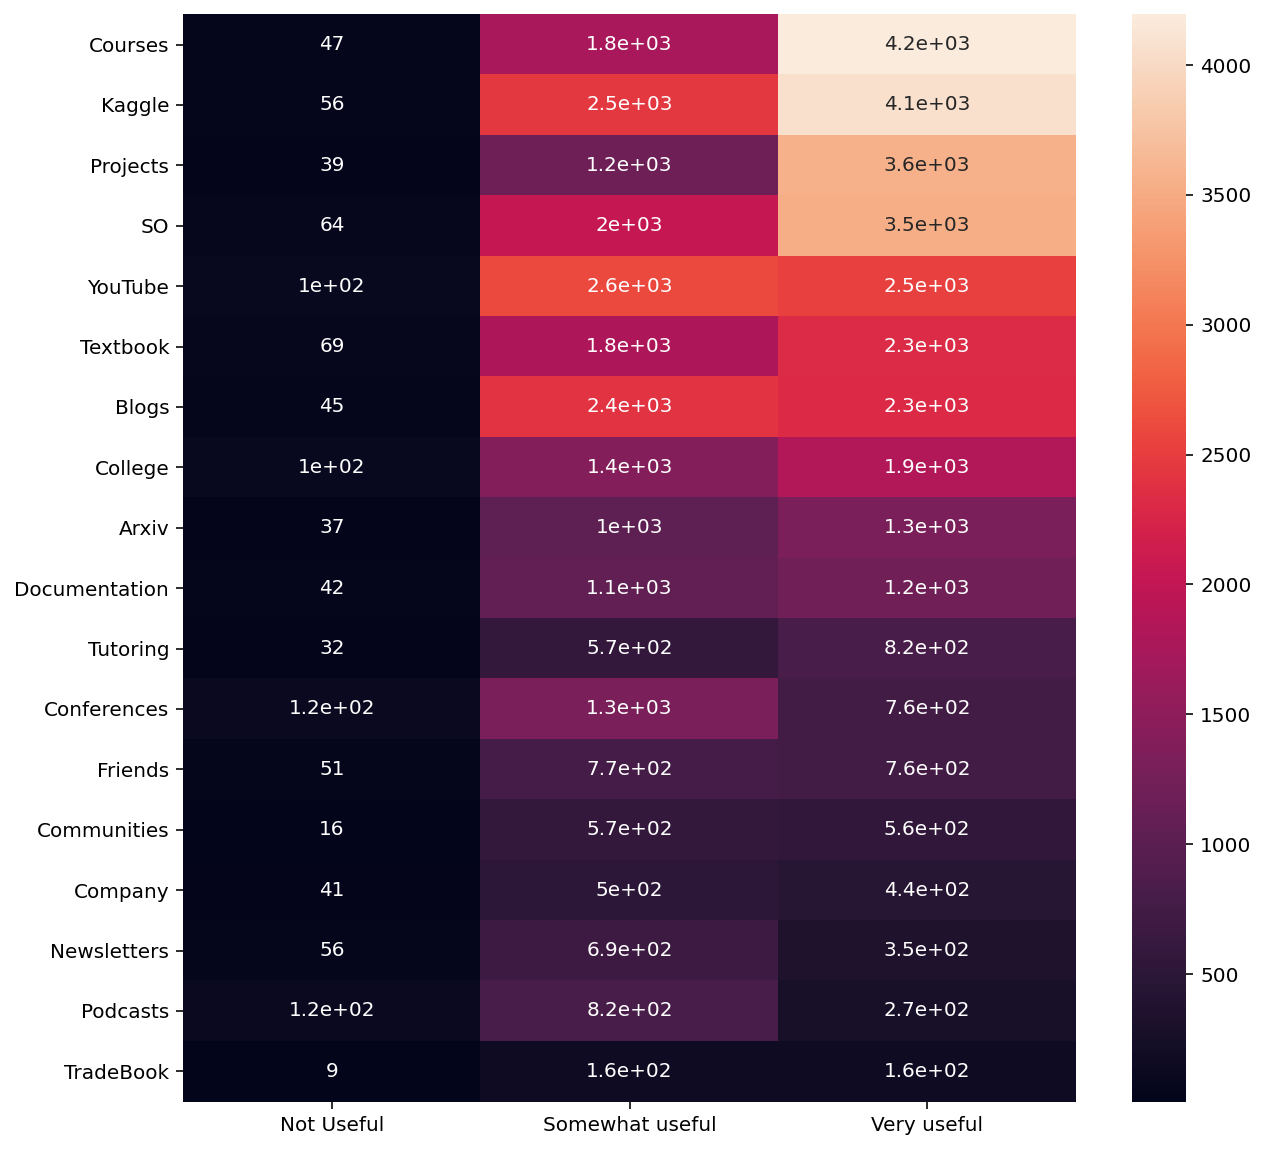

In [50]:
# 학습플랫폼과 유용함에 대한 연관성을 살펴보기

fdf = {}

for feature in use_features:
  a = mcq[feature].value_counts()
  fdf[feature[len('LearningPlatformUsefulness'): ]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려보기
plt.figure(figsize=(10, 10))
sns.heatmap(
    fdf.sort_values('Very useful', ascending=False), annot=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

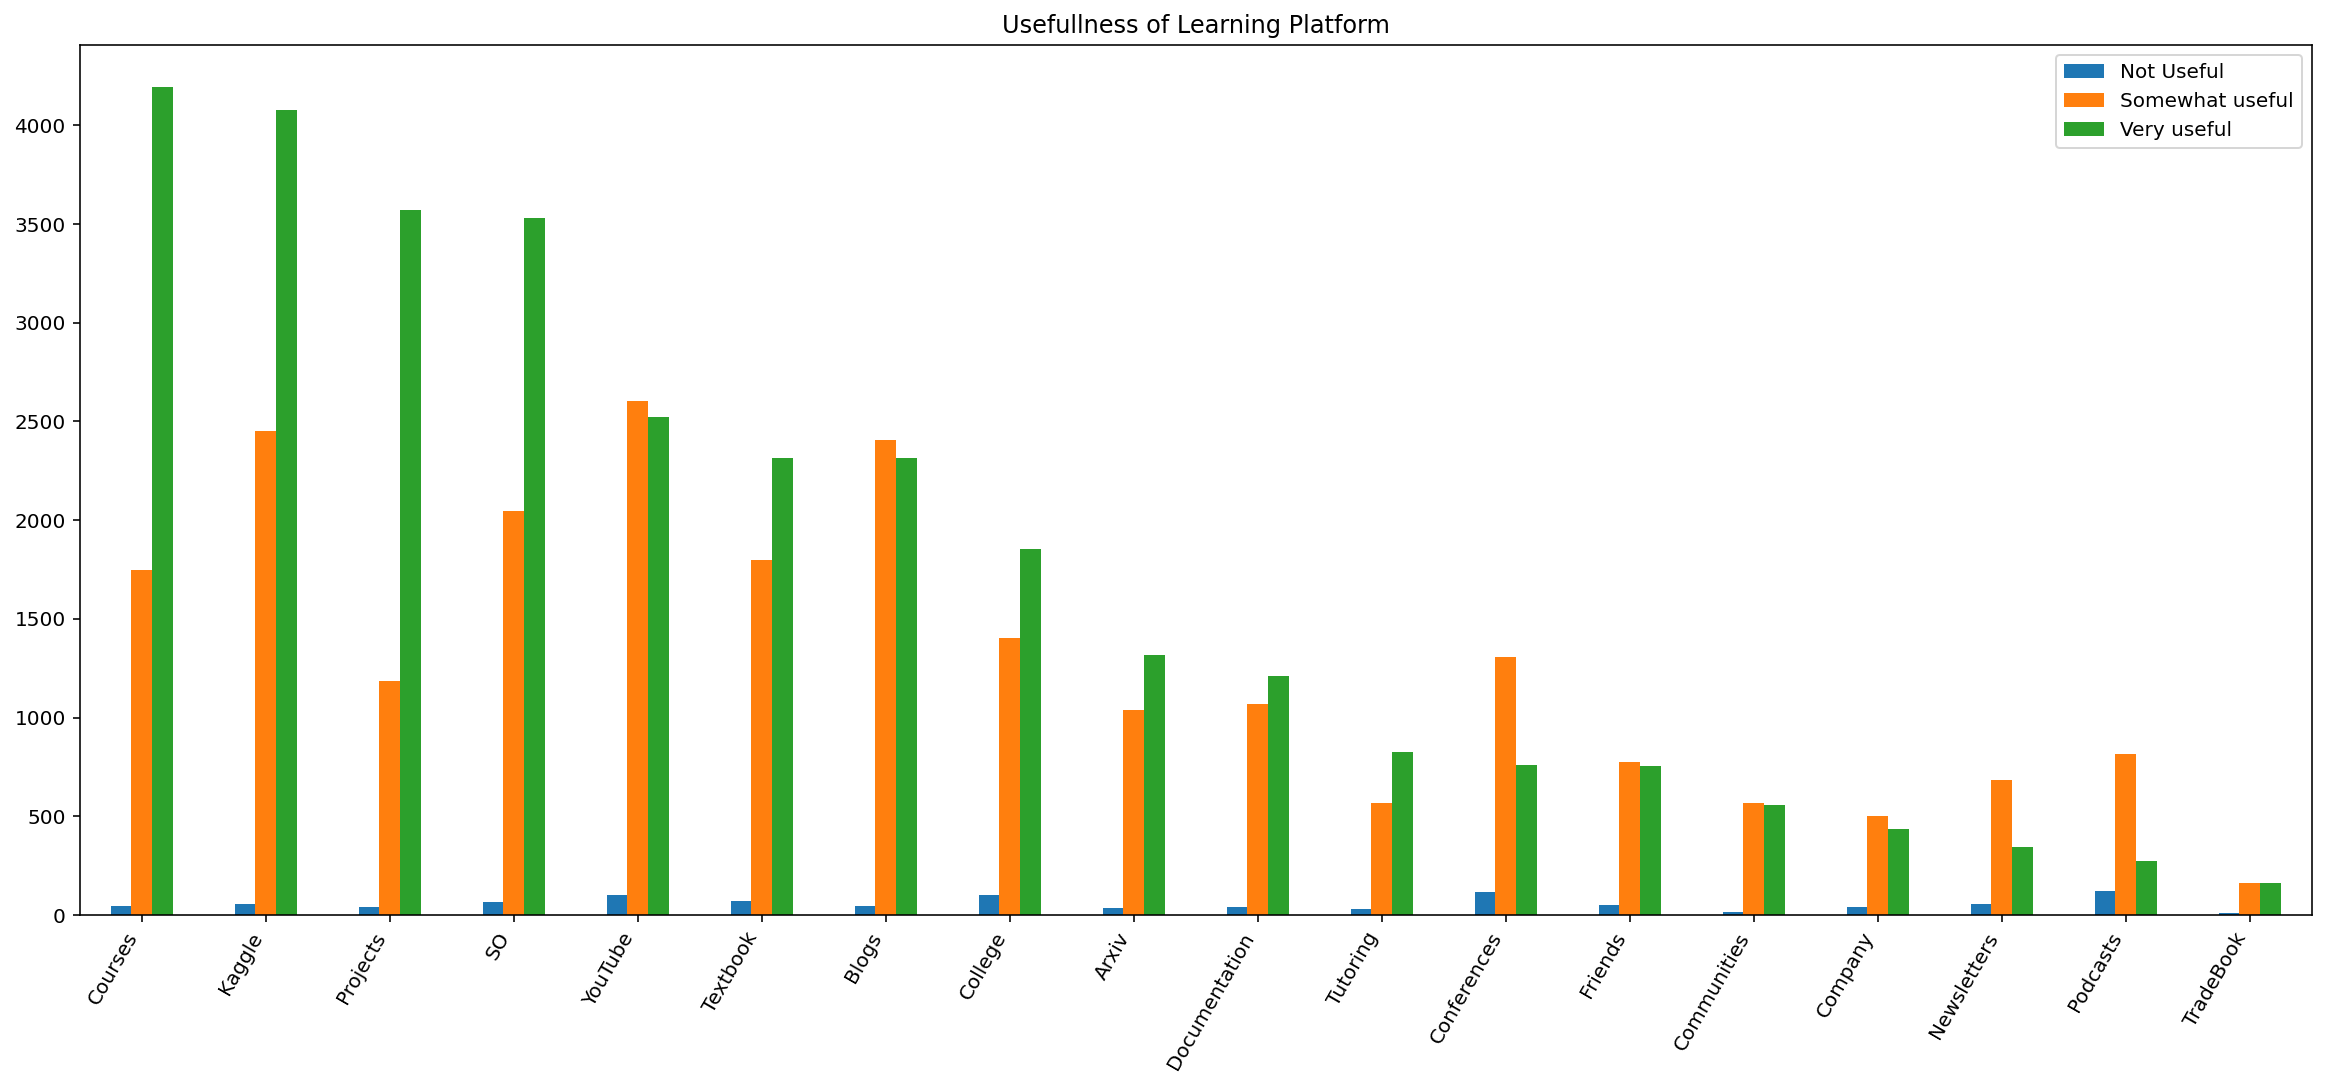

In [51]:
# 유용함의 정도를 각 플랫폼 별로 그룹화해 나타내기

fdf.plot(kind='bar', figsize=(20, 8),
         title='Usefullness of Learning Platform')
plt.xticks(rotation=60, ha='right')

courses, kaggle, projects, SO, youtube가 도움이 많이 되는 편이라고 응답하였다

In [52]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]

cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [53]:
cdf = {}

for feature in cat_features:
  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()

# 파이차트를 그리기 위한 평균값을 구해서 담아주기

cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

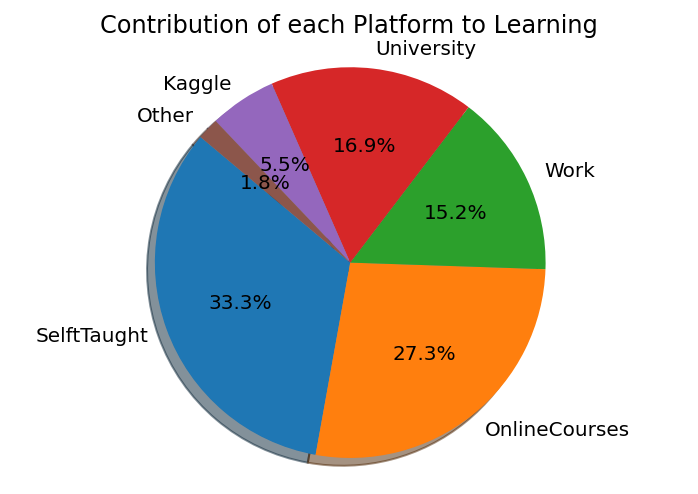

In [54]:
# 학습플랫폼 별 도움이 되는 정도를 그려보기
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

개인 프로젝트를 해보는 것이 가장 큰 도움이 되었으며, 온라인 코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답했다.

# Q4 데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가요?


In [55]:
# 설문 내용과 누구에게 물어봤는지를 찾아보기
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [56]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

# 널값을 제외한 HardwarePersonalProjectsSelect에 대한 질문의 응답은 4206건이다.

(4206,)

In [57]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))

s = mcq.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack().reset_index(level=1, drop=True)

s.name = 'hardware'

In [58]:
s = s[s != 'nan']

In [59]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


맥북을 사용하는 응답자가 가장 많았고 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음을 차지하였음</br>
적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음임

#Q5 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

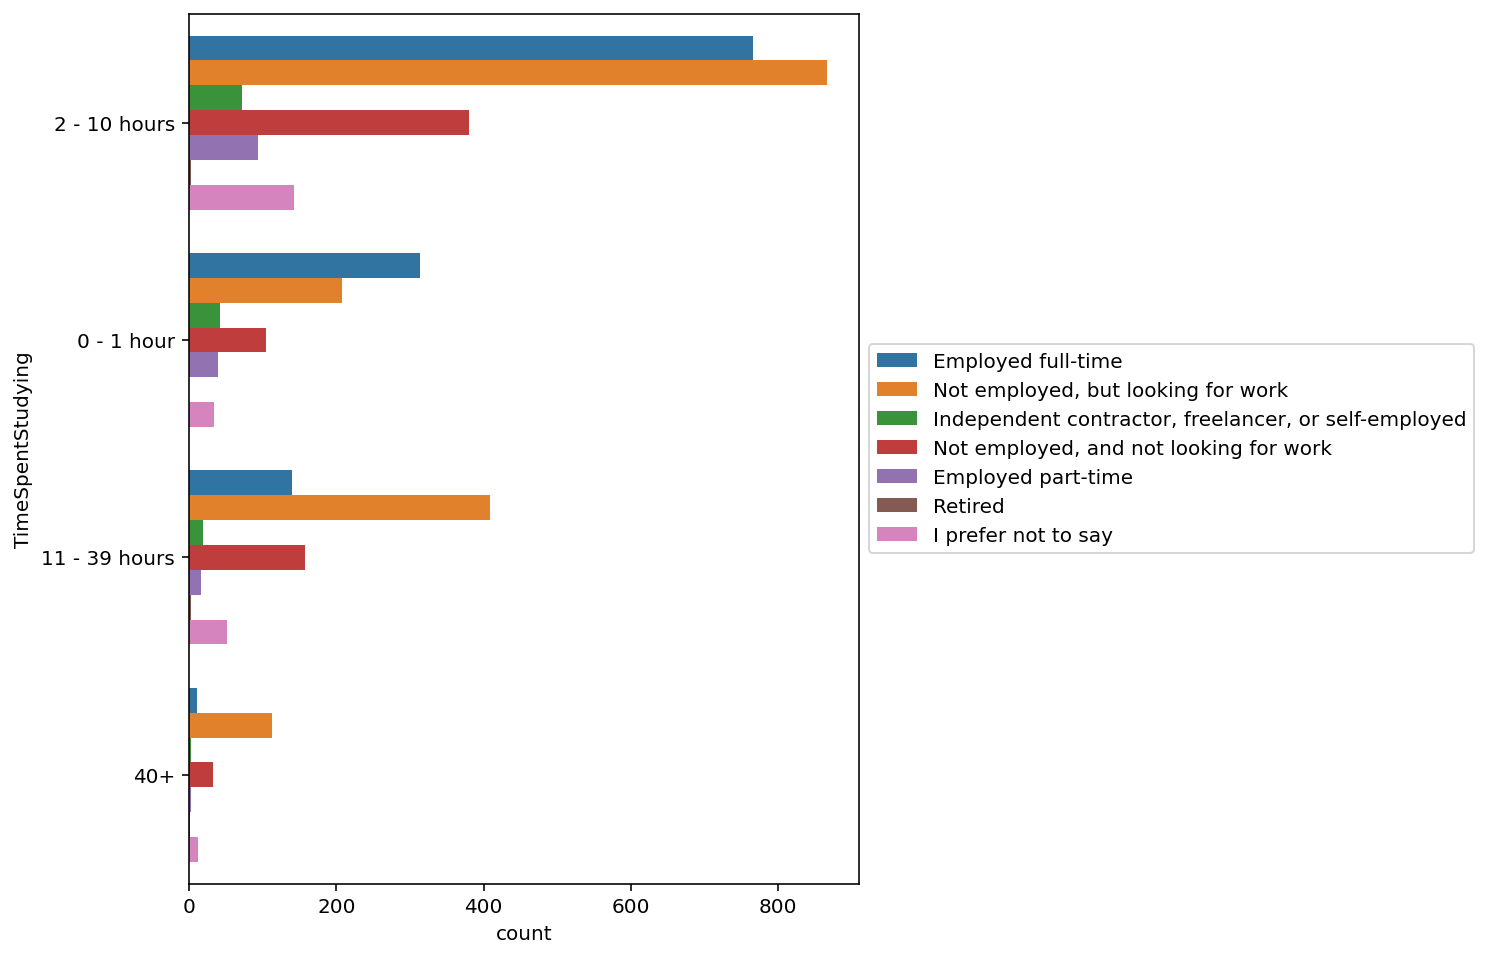

In [60]:
plt.figure(figsize=(6, 8))
sns.countplot(y= 'TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus').legend(loc='center left', bbox_to_anchor=(1, 0.5))

# .legend(loc='center left', bbox_to_anchor=(1, 0.5))은 범례를 보여주고 위치를 조정하는 역할을 함

모두 2 ~ 10시간 공부하는 사람들이 가장 많고 11 ~ 39시간에서 구직자가 가장 많다.</br>

하지만 응답자 중 대부분이 풀타임으로 일하는 사람들이라는 점을 고려해봐야 한다. 

In [61]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work'
)]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


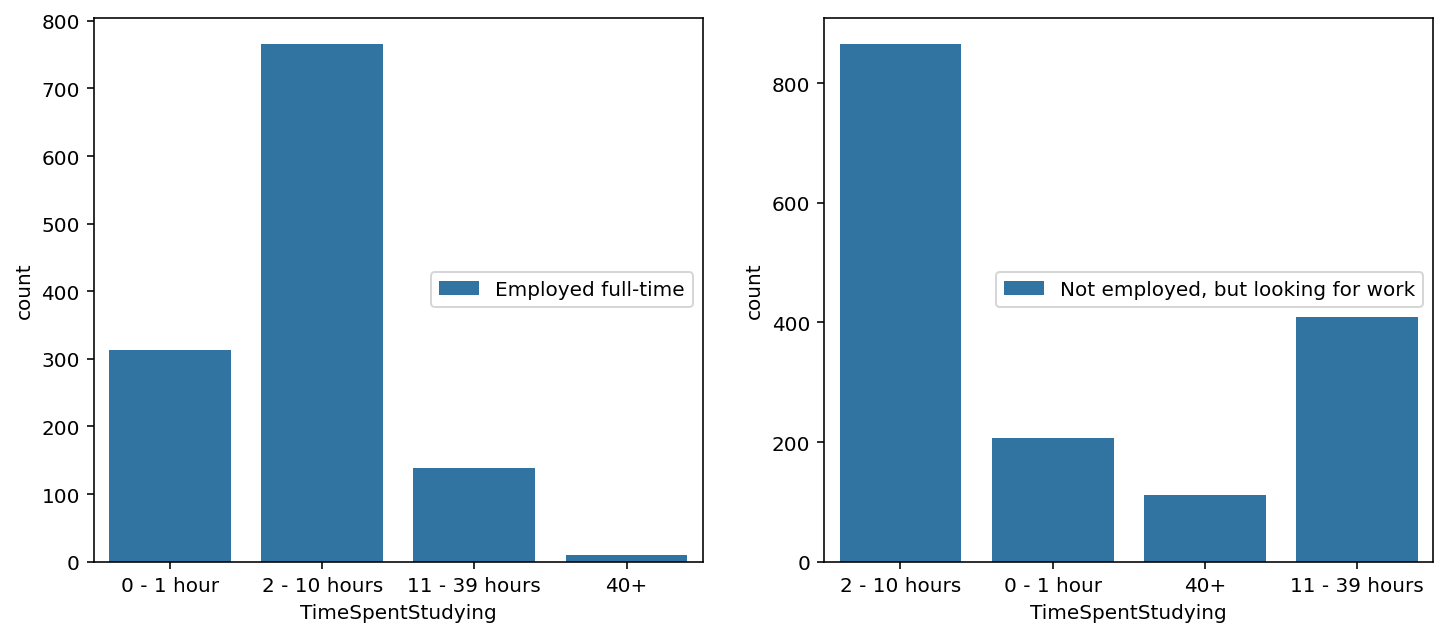

In [62]:
figuer, (ax1, ax2) = plt.subplots(ncols=2)

figuer.set_size_inches(12, 5)
sns.countplot(x = 'TimeSpentStudying',
              data=full_time,
              hue='EmploymentStatus',
              ax=ax1).legend(loc='center right',
                              bbox_to_anchor=(1,0.5))
              
sns.countplot(x = 'TimeSpentStudying',
              data=looking_for_job,
              hue='EmploymentStatus',
              ax=ax2).legend(loc='center right',
                              bbox_to_anchor=(1,0.5))

#Q6 블로그, 팟캐스트, 수업 기타 등등 추천할 만한 것이 있는지?

In [63]:
mcq['BlogsPodcastsNewslettersSelect']= mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x : x.split(','))

mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [64]:
s = mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [65]:
s = s[s != 'nan'].value_counts().head(20)

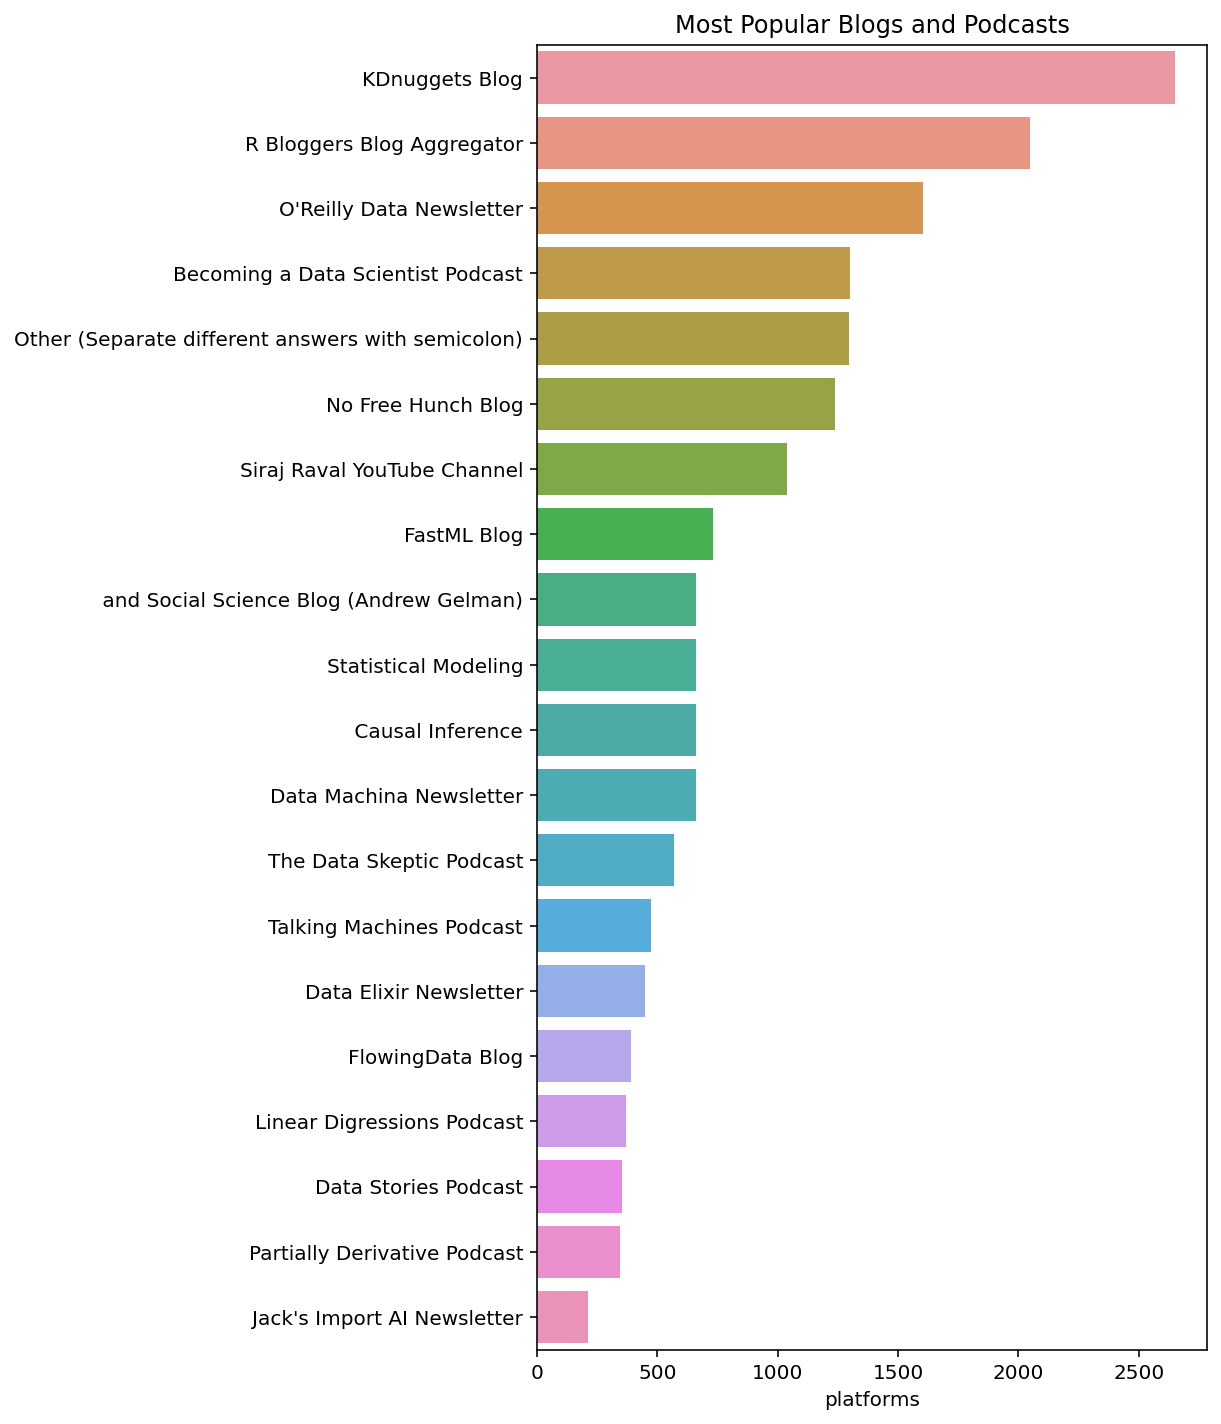

In [66]:
plt.figure(figsize=(6,12))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)

가장 유명한 블로그 및 팟캐스트는 KDnuggets Blog이고 그 뒤로 R Bloggers Blog Aggregator 와 O'Reilly Data Newsletter이다.</br>
[Machine Learning, Data Science, Big Data, Analytics](https://www.kdnuggets.com/)

[Becoming a Data Scientist - YouTube - YouTube](https://www.youtube.com/channel/UCfxnrdBM1YRV9j2MB8aiy4Q)

[Siraj Raval - YouTube - YouTube](https://www.youtube.com/channel/UCWN3xxRkmTPmbKwht9FuE5A)

In [67]:
# Course platform 알아보기

mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))

mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [68]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
t.name = 'Courses'

t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: Courses, dtype: object

In [69]:
t = t[t != 'nan'].value_counts()

In [70]:
t

Coursera    1725
Udacity      805
edX          710
DataCamp     638
Other        356
Name: Courses, dtype: int64

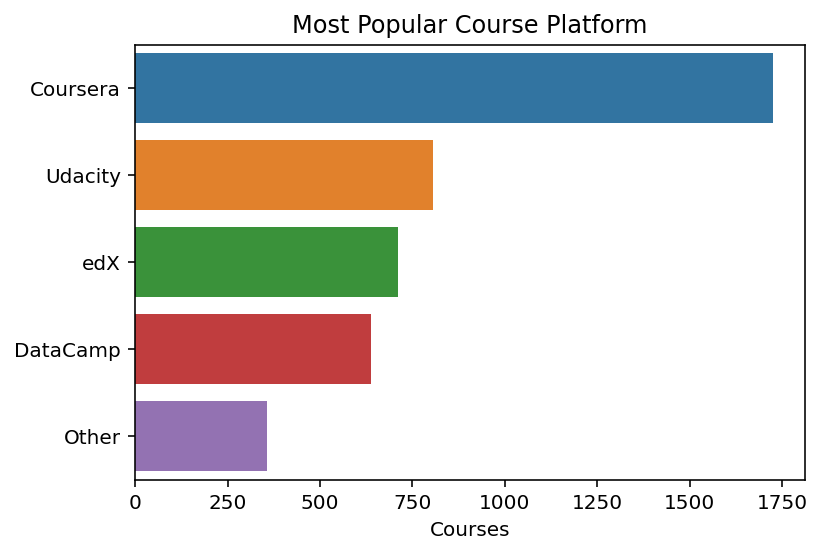

In [71]:
plt.title('Most Popular Course Platform')
sns.barplot(y=t.index, x=t)

가장 유명한 코스로는 Coursera가 있고 그 뒤로 Udacity가 있다.

# Q7 데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은 무엇인가?

In [72]:
job_features = [x for x in mcq.columns if x.find('JobSkillImportance') != -1 
                and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [73]:
jdf = {}

for feature in job_features:
  a = mcq[feature].value_counts()
  a = a/a.sum()
  jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'KaggleRanking': Nice to have    0.677261
 Unnecessary     0.203876
 Necessary       0.118863
 Name: JobSkillImportanceKaggleRanking, dtype: float64,
 'MOOC': Nice to have    0.606994
 Unnecessary     0.285752
 Necessary       0.107255
 Name: JobSkillImportanceMOOC, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have 

In [74]:
jdf = pd.DataFrame(jdf).transpose()
# heatmap을 그리기 위해 transpose()를 사용하여 행과 열을 바꿔준다.

jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


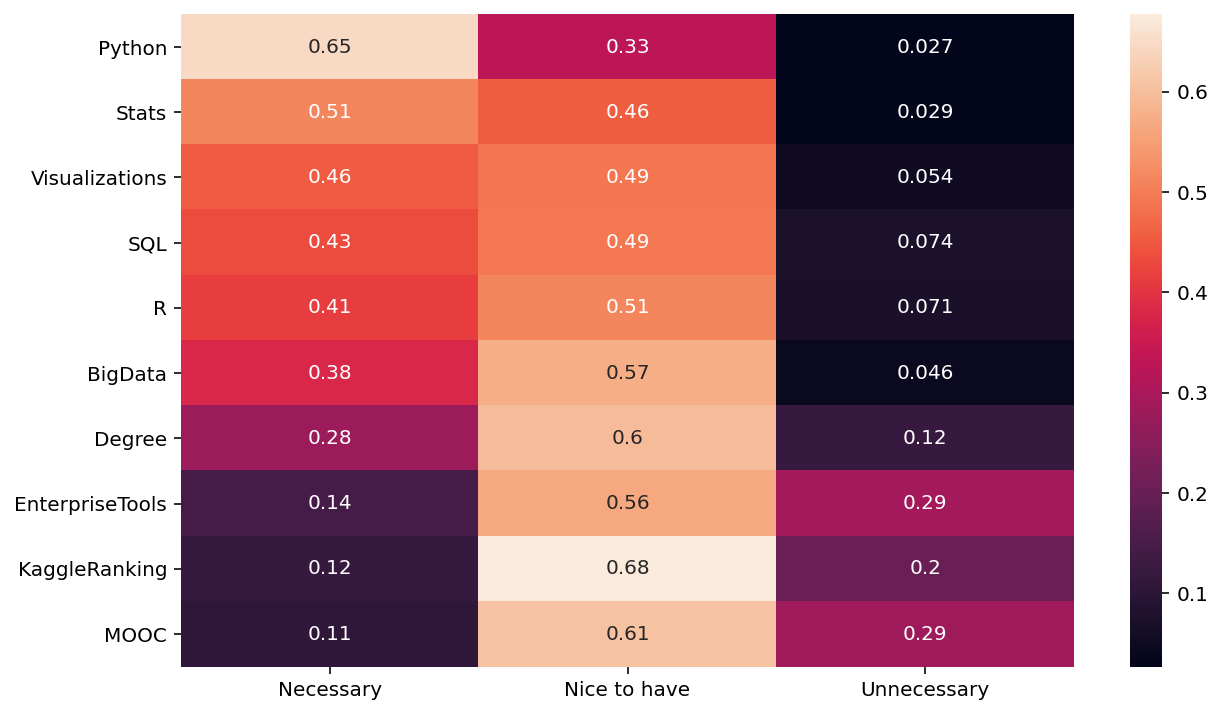

In [75]:
plt.figure(figsize=(10, 6))

sns.heatmap(jdf.sort_values('Necessary',
                            ascending=False), annot=True)

# Necessary 열을 기준으로, ascending=False을 하여 내림차순으로 heatmap을 그리고 annot=True를 하여 퍼센트를 보여준다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

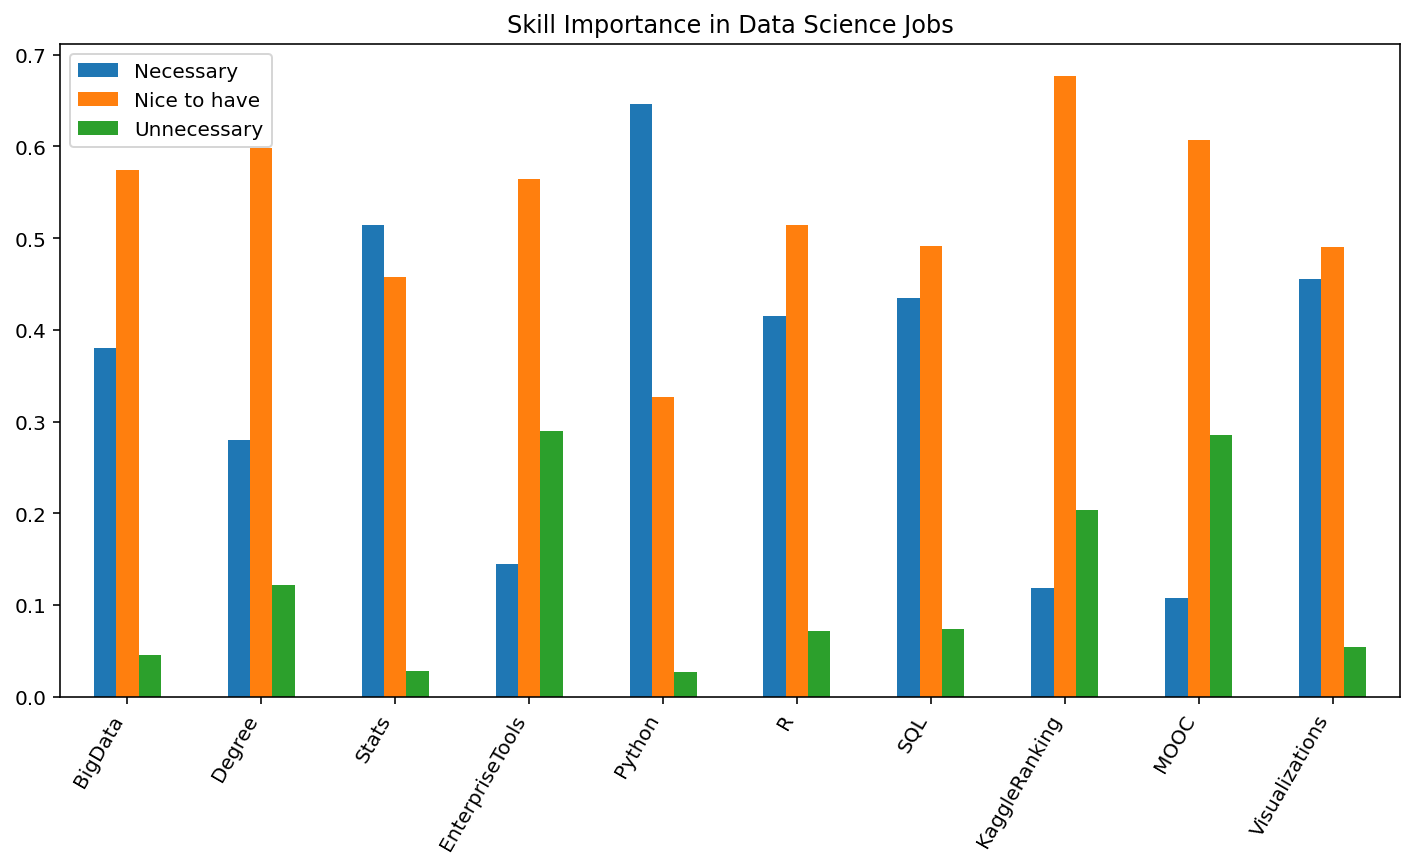

In [76]:
jdf.plot(kind='bar', figsize=(12, 6),
         title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

# 데이터프레임.plot을 통해 그래프를 쉽게 그릴 수 있음

데이터 사이언스에서 가장 필요한 스킬은 파이썬, 통계, 시각화, SQL 등이 있고 있으면 좋은 것으로는 캐글랭킹, MOOC, 학위 등이 있다.

# Q8 데이터 과학자의 평균 급여는 얼마나 될까?

In [77]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [78]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',', '')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-', '')
# 'CompensationAmount' 열에 있는 콤마와 '-'를 공백으로 바꿔준다.


In [79]:
# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('/content/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)
# rates 에서 'Unnamed: 0'라는 열을 지운다.

In [80]:
rates.head()

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350


In [81]:
salary = mcq[['CompensationAmount',
             'CompensationCurrency',
             'GenderSelect',
             'Country',
             'CurrentJobTitleSelect']].dropna()

salary.head()


,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect
3,250000,USD,Male,United States,Operations Research Practitioner
8,80000,AUD,Female,Australia,Business Analyst
9,1200000,RUB,Male,Russia,Software Developer/Software Engineer
11,95000,INR,Male,India,Data Scientist
14,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer


In [82]:
salary = salary.merge(rates, left_on='CompensationCurrency', right_on='originCountry', how='left')

salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402
3,95000,INR,Male,India,Data Scientist,INR,0.015620
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304


In [83]:
# 'Salary' 열 생성 
# CompensationAmount * exchangeRate 을 하여 USD로 변환
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [84]:
print('Maximum Salary is USD$', 
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD$', 
      salary['Salary'].dropna().astype(int).min())
print('Average Salary is USD$', 
      salary['Salary'].dropna().astype(int).mean())
print('Average Salary is USD$', 
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD$ 28297400000
Minimum Salary is USD$ 0
Average Salary is USD$ 6606008.430437773
Average Salary is USD$ 53812.0


평균 급여는 6606008 달러이지만 이상치들이 있어서 값이 정확하지 않음</br>
중간 값은 53812 달러임

Text(0.5, 1.0, 'Salary Distribution')

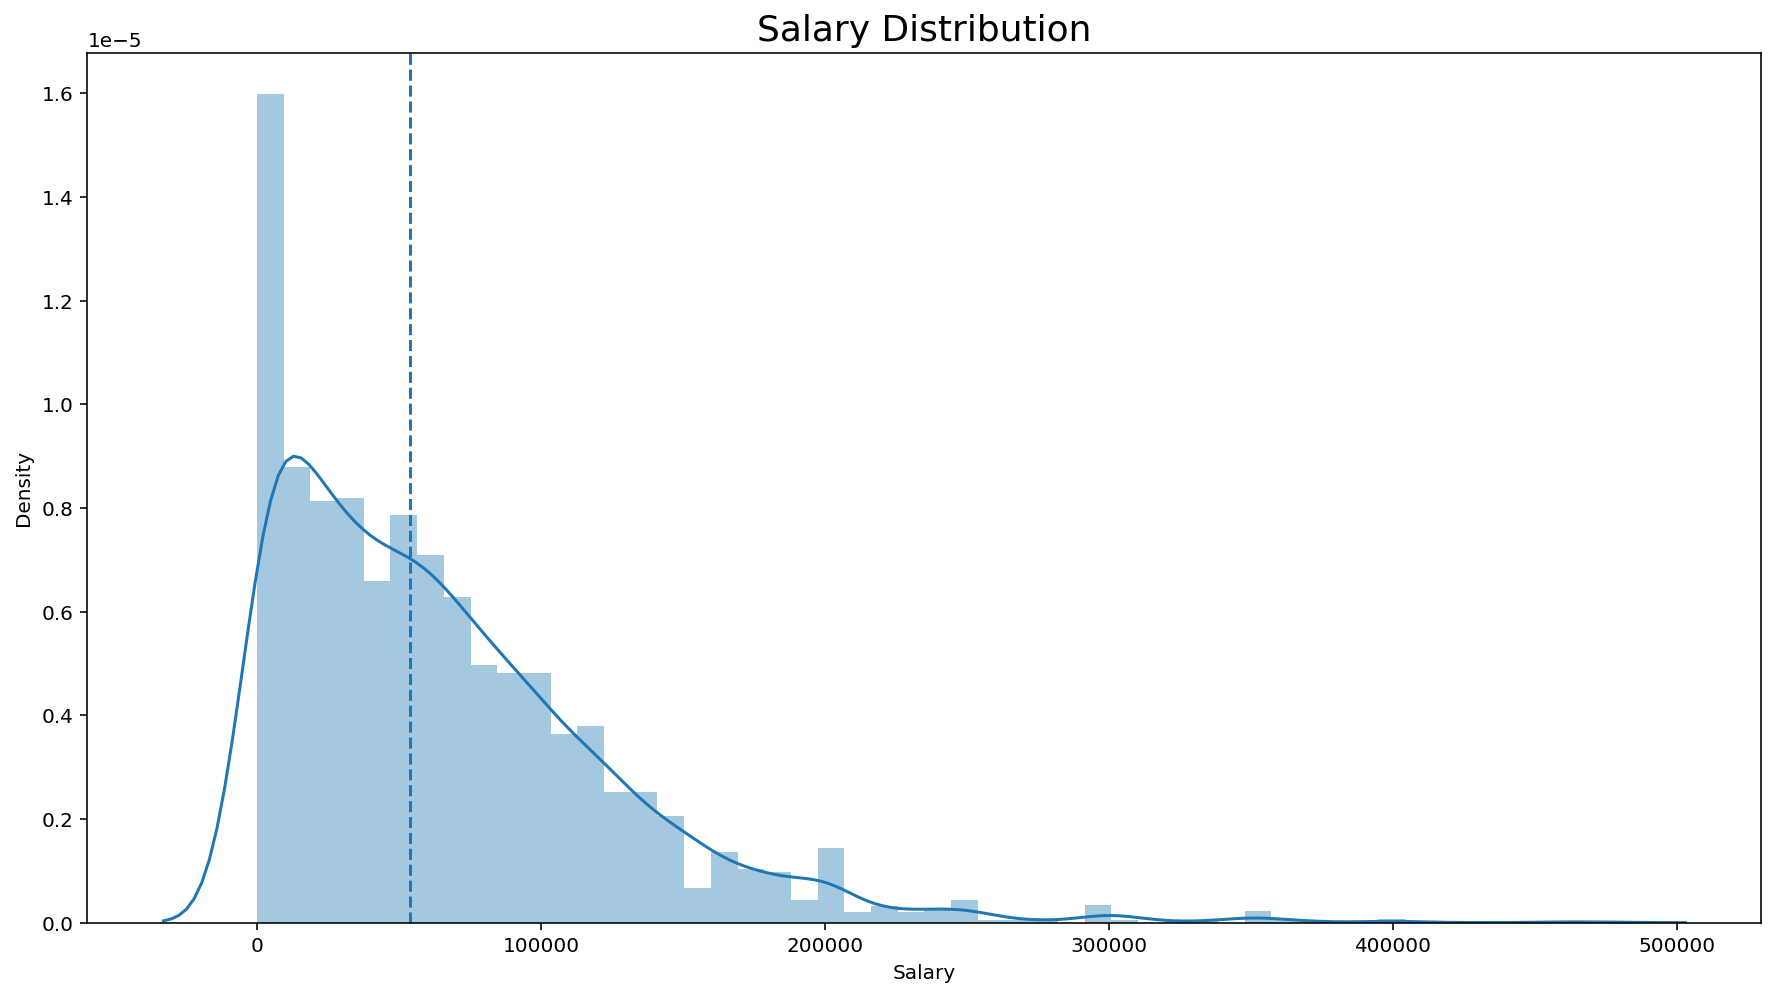

In [85]:
plt.subplots(figsize=(15, 8))
salary = salary[salary['Salary'] < 500000]
sns.distplot(salary['Salary'])

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=18)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

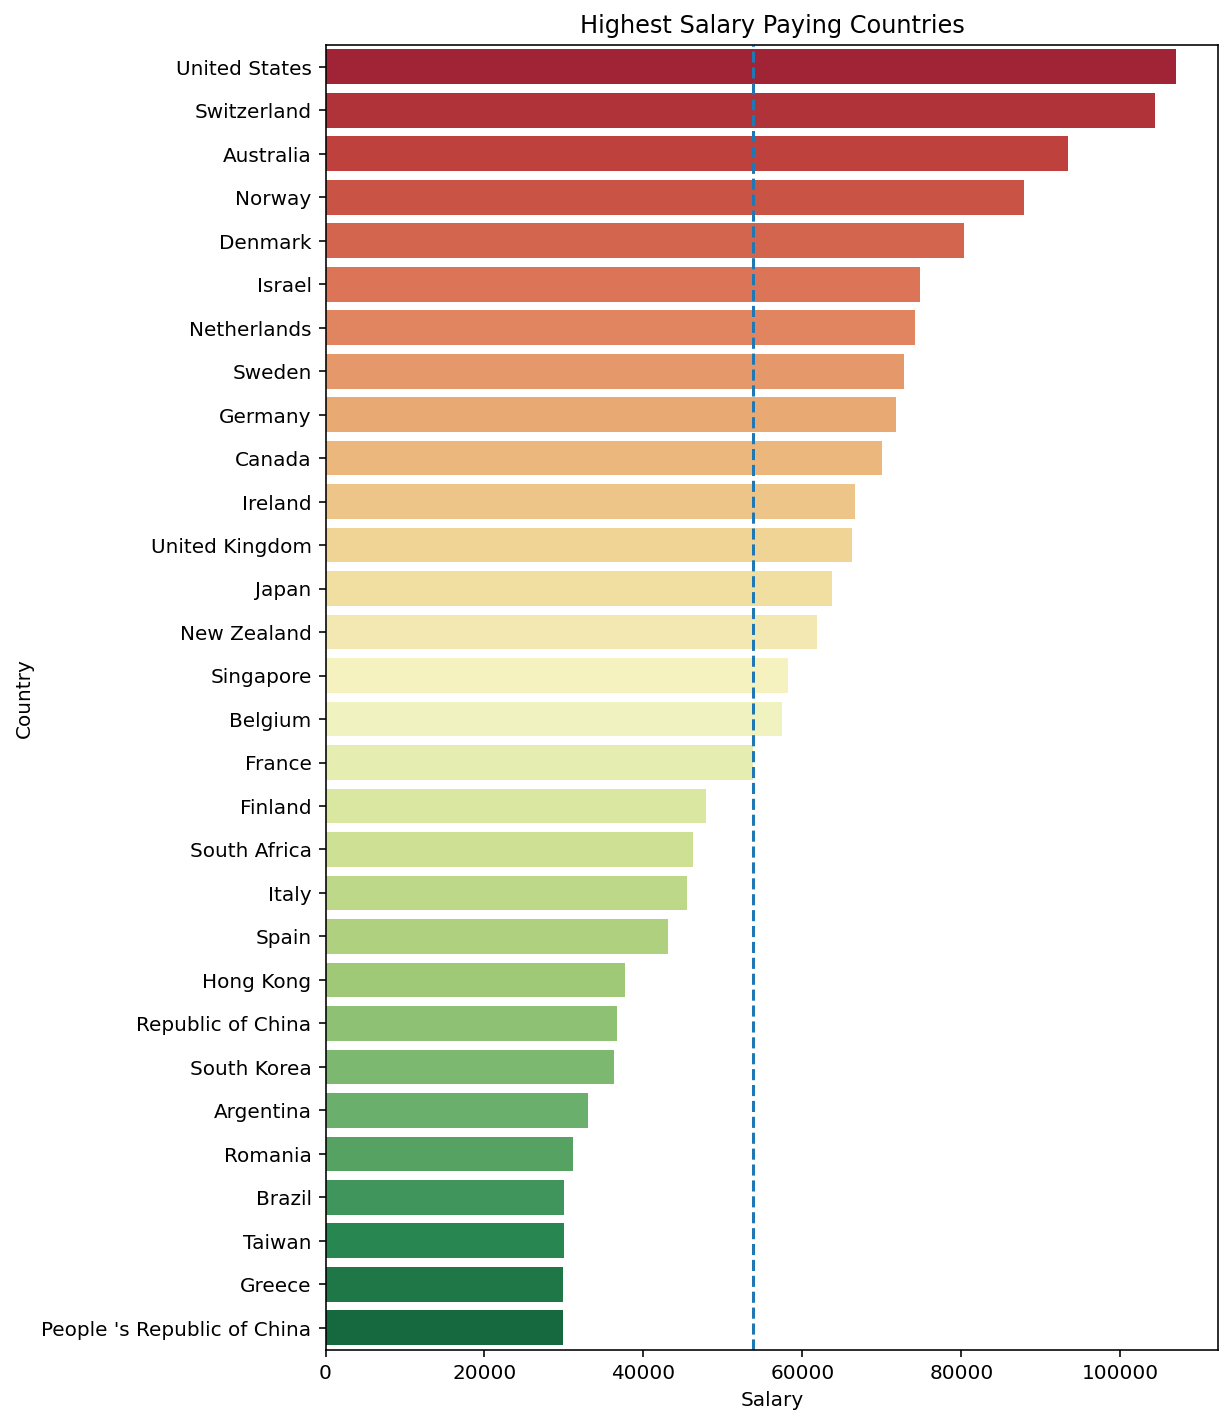

In [86]:
plt.subplots(figsize=(8, 12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()
# 국가를 기준으로 그룹화하여 salary의 평균을 구하고 내림차순으로 정렬을 하고 
# 30개로 슬라이싱하고 dataframe으로 변환해준다

sns.barplot('Salary',
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

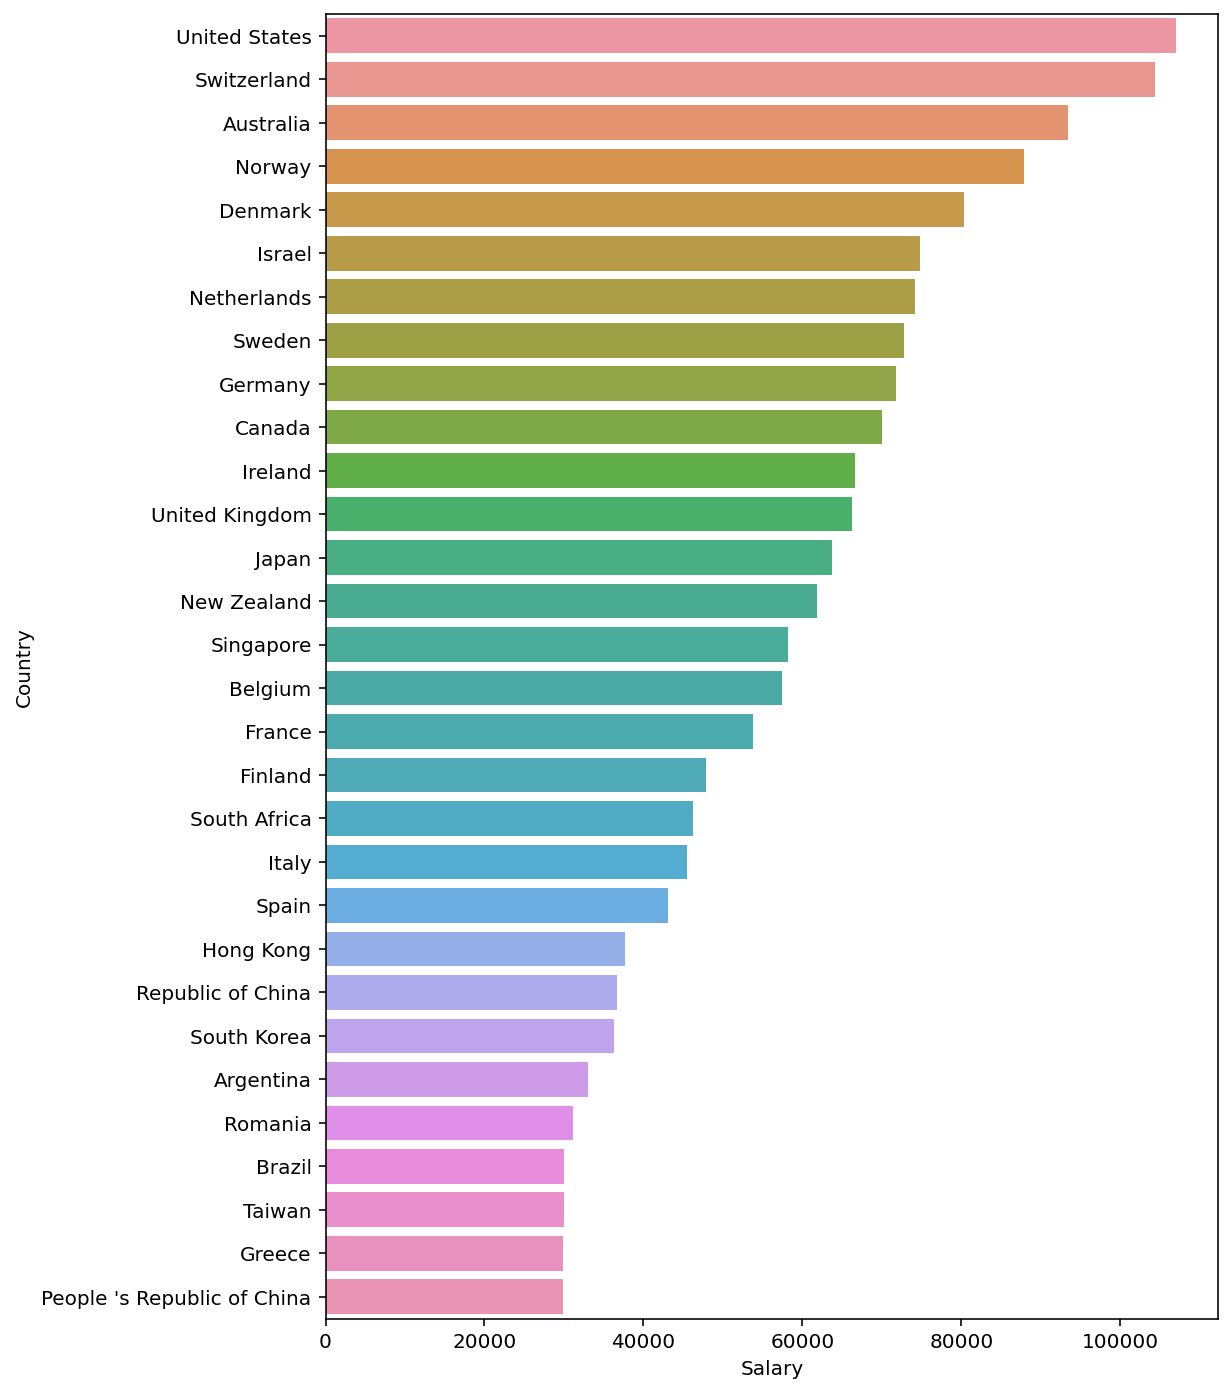

In [87]:
plt.figure(figsize=(8, 12))

sns.barplot(y=sal_coun.index, x= sal_coun.Salary)

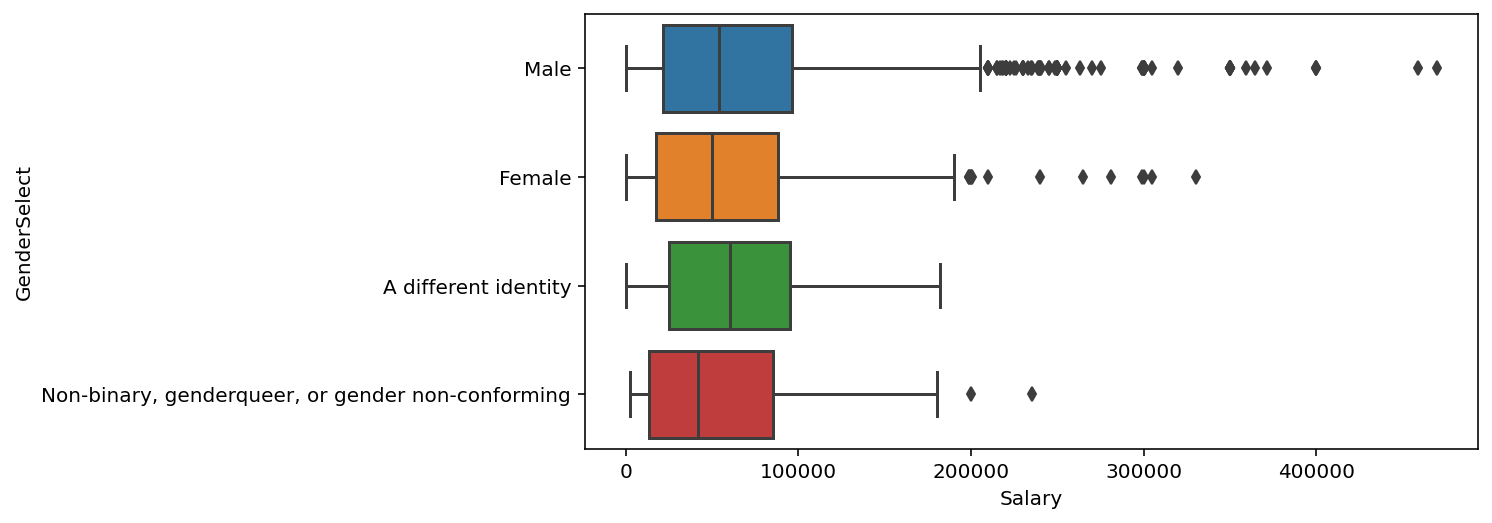

In [88]:
# 성별 salary 비교

plt.subplots(figsize=(8, 4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

# Q9 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [89]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype(str).apply(lambda x: x.split(','))
mcq['PublicDatasetsSelect']

0        [Dataset aggregator/platform (i.e. Socrata/Kag...
1        [Dataset aggregator/platform (i.e. Socrata/Kag...
2        [Dataset aggregator/platform (i.e. Socrata/Kag...
3              [I collect my own data (e.g. web-scraping)]
4                                                 [GitHub]
                               ...                        
16711                                                [nan]
16712    [Dataset aggregator/platform (i.e. Socrata/Kag...
16713                                                [nan]
16714                                                [nan]
16715                                                [nan]
Name: PublicDatasetsSelect, Length: 16716, dtype: object

In [90]:
q = mcq.apply(lambda x : pd.Series(x['PublicDatasetsSelect']), axis=1).stack().reset_index(level=1, drop=True)

q.name = 'Courses'

In [91]:
q = q[q != 'nan'].value_counts().to_frame()

In [92]:
q

,Courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


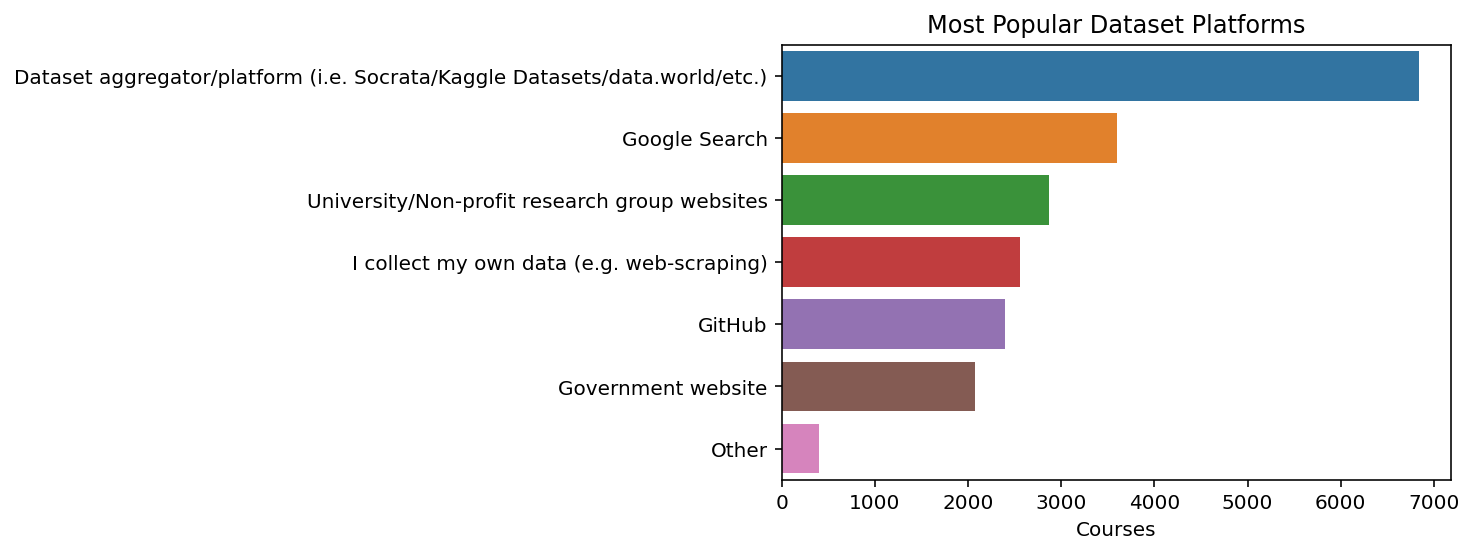

In [93]:
plt.title('Most Popular Dataset Platforms')
sns.barplot(y=q.index, x=q.Courses)

캐글 및 socrata는 개인 프로젝트나 학습에 사용하기 위한 데이터를 얻는데 인기 있는 플랫폼이다.</br>
구글 검색 및 대학, 비영리 단체 웹사이트는 각각 2, 3위이다.</br>
직접 웹스크래핑한다는 응답은 4위이다.

In [94]:
# 주관식 응답 읽어오기
ff = pd.read_csv('/content/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [95]:
# 설문내용과 누구에게 물어봤는지 찾아보기
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

#Q10 개인 프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?

In [96]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().to_frame().head()
ppcff.name = '응답수'
ppcff

,PersonalProjectsChallengeFreeForm
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14


데이터 셋을 다루는 데 어려운 점은 상위 5위가 대부분 데이터를 정제하는 일이라고 응답하였다.

In [97]:
from wordcloud import WordCloud, STOPWORDS

def displayWordCloud(data= None, backgroundcolor= 'white', width= 1200, height= 600):
  wordcloud = WordCloud(stopwords = STOPWORDS,
                        background_color = backgroundcolor,
                        width= width, height= height).generate(data)

  plt.figure(figsize=(15, 10))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

In [98]:
ppc = ff['PersonalProjectsChallengeFreeForm'].dropna()

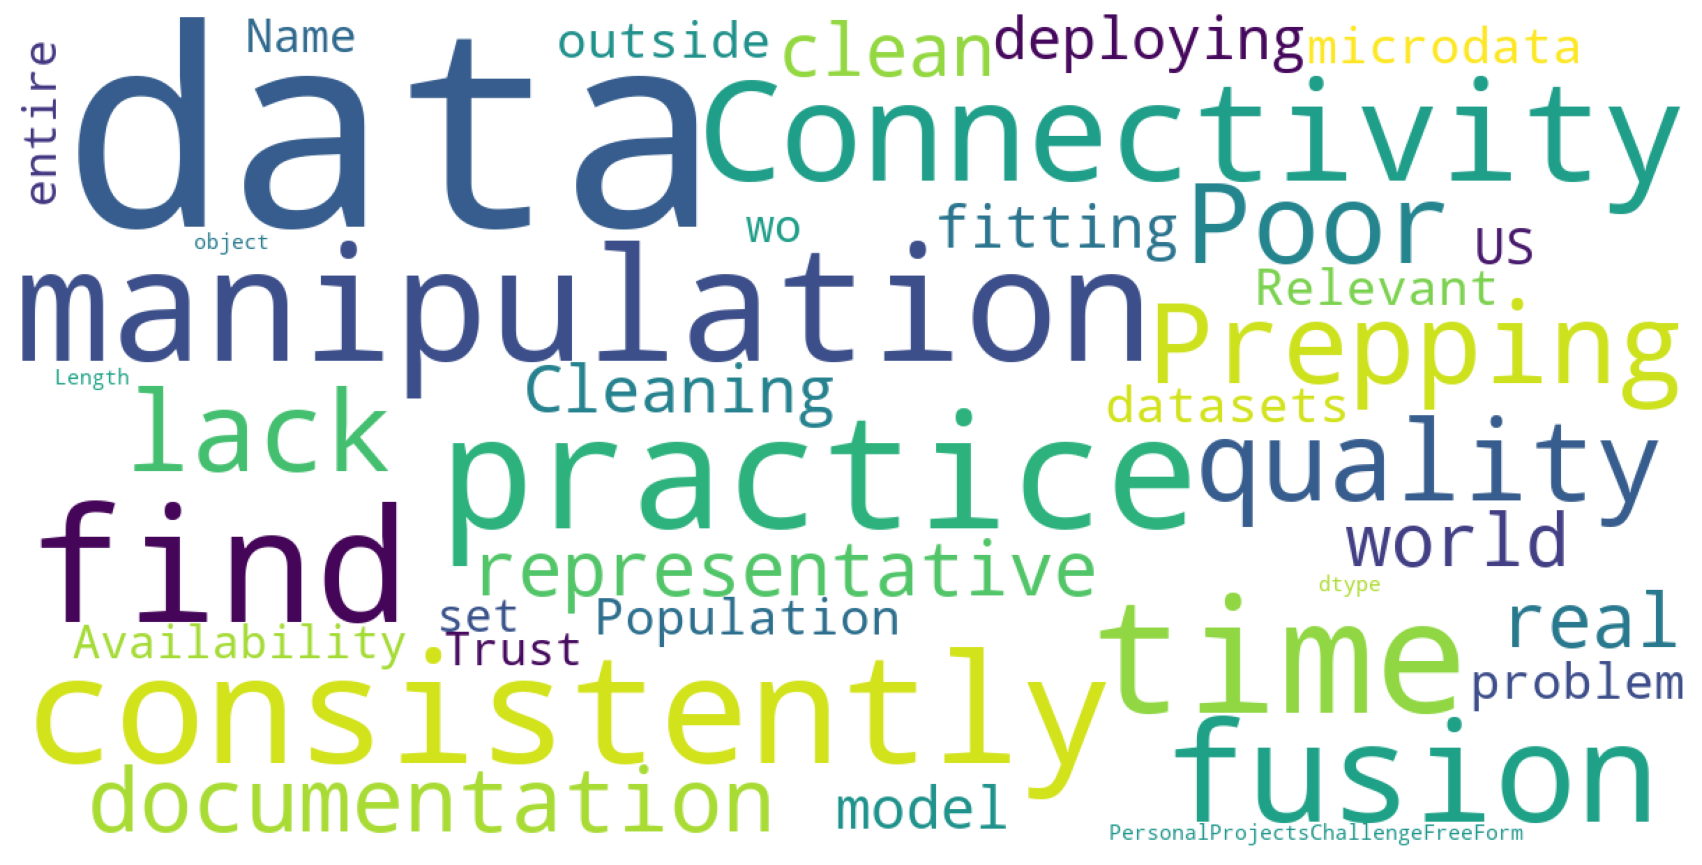

CPU times: user 1.45 s, sys: 40.9 ms, total: 1.49 s
Wall time: 1.5 s


In [99]:
%time displayWordCloud(''.join(str(ppc)))

# Q11 데이터 사이언스 직업을 찾는 데 가장 고려해야할 요소는 무엇일까?

In [100]:
# 설문내용과 누구에게 물어봤는지를 물어봄

qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [102]:
job_factors = [x for x in mcq.columns if x.find('JobFactor') != -1]
job_factors

['JobFactorLearning',
 'JobFactorSalary',
 'JobFactorOffice',
 'JobFactorLanguages',
 'JobFactorCommute',
 'JobFactorManagement',
 'JobFactorExperienceLevel',
 'JobFactorDepartment',
 'JobFactorTitle',
 'JobFactorCompanyFunding',
 'JobFactorImpact',
 'JobFactorRemote',
 'JobFactorIndustry',
 'JobFactorLeaderReputation',
 'JobFactorDiversity',
 'JobFactorPublishingOpportunity']

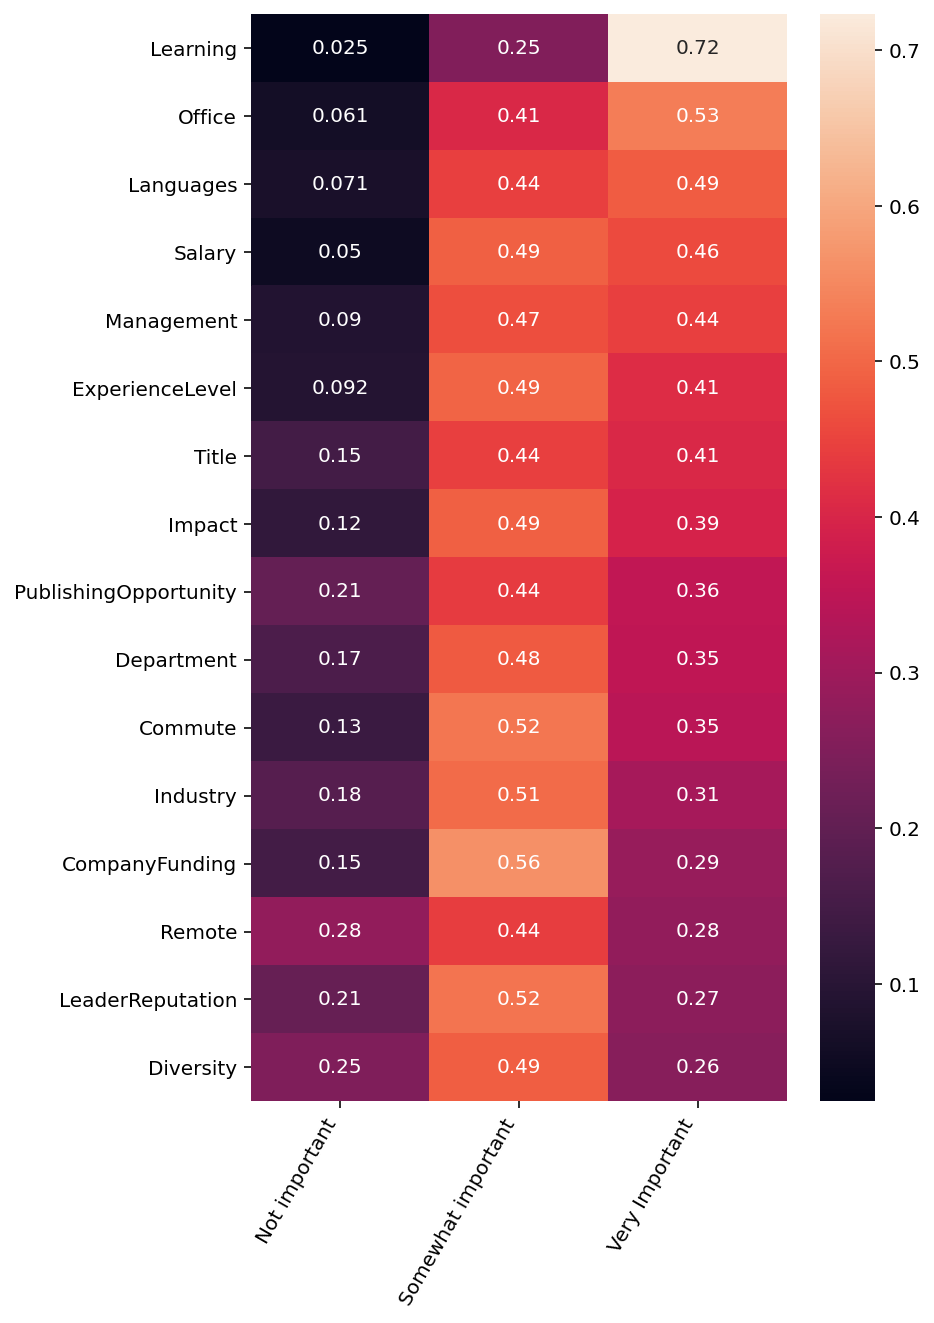

In [107]:
jfdf= {}

for factor in job_factors:
  a = mcq[factor].value_counts()
  a = a/a.sum()
  jfdf[factor[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6, 10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important',
                               ascending=False), annot=True)



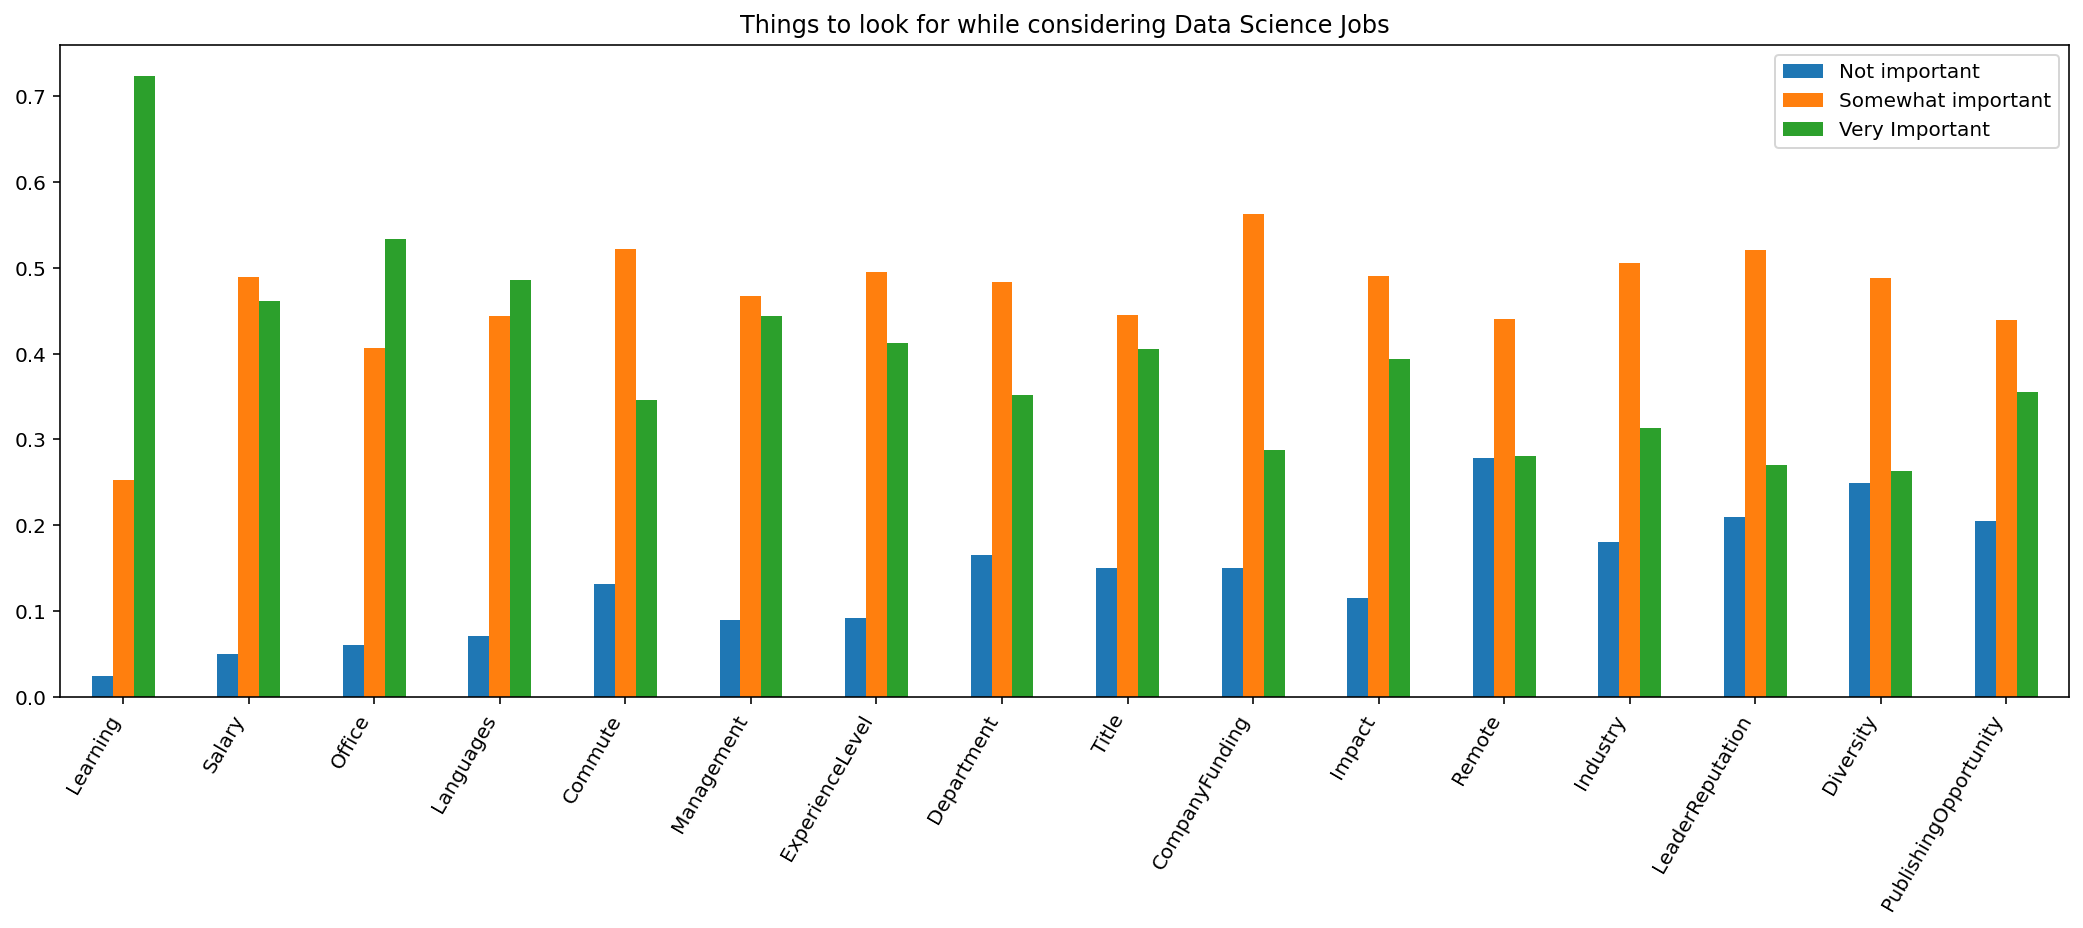

In [108]:
jfdf.plot(kind='bar', figsize=(18, 6),
          title='Things to look for while considering Data Science Jobs')
plt.xticks(rotation=60, ha='right')
plt.show()

데이터 사이언티스트로 직업을 찾을 때 가장 고려해야 할 요소로는 배울 수 있는 곳인지, 사무실 근무환경, 프레임워크나 언어, 급여, 경영상태, 경력정도 순이다.

# Q12 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

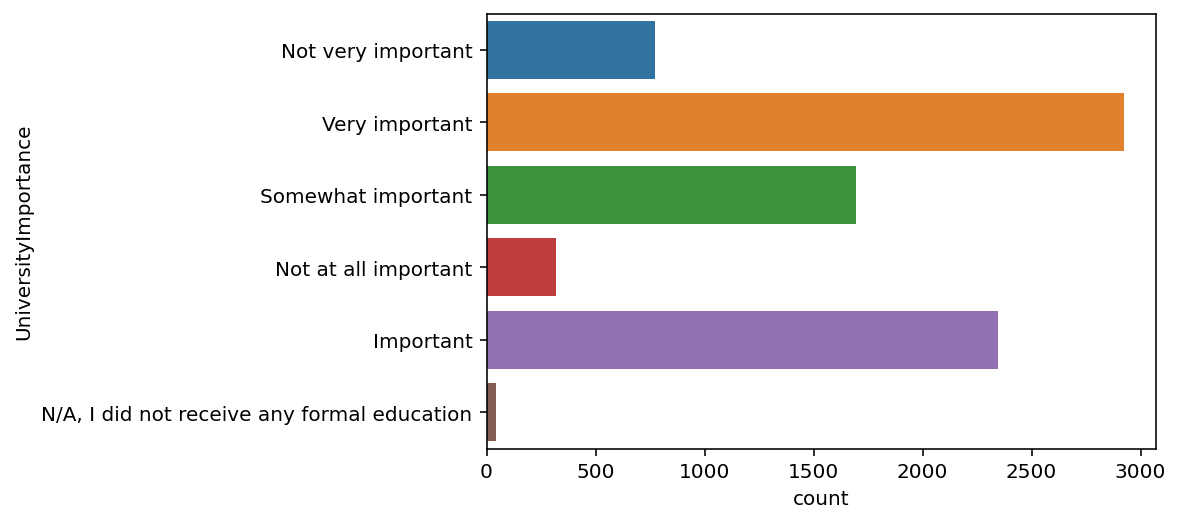

In [110]:
sns.countplot(y='UniversityImportance', data=mcq)

# Q13 어디에서부터 데이터 사이언스를 시작해야 할까요?

In [116]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

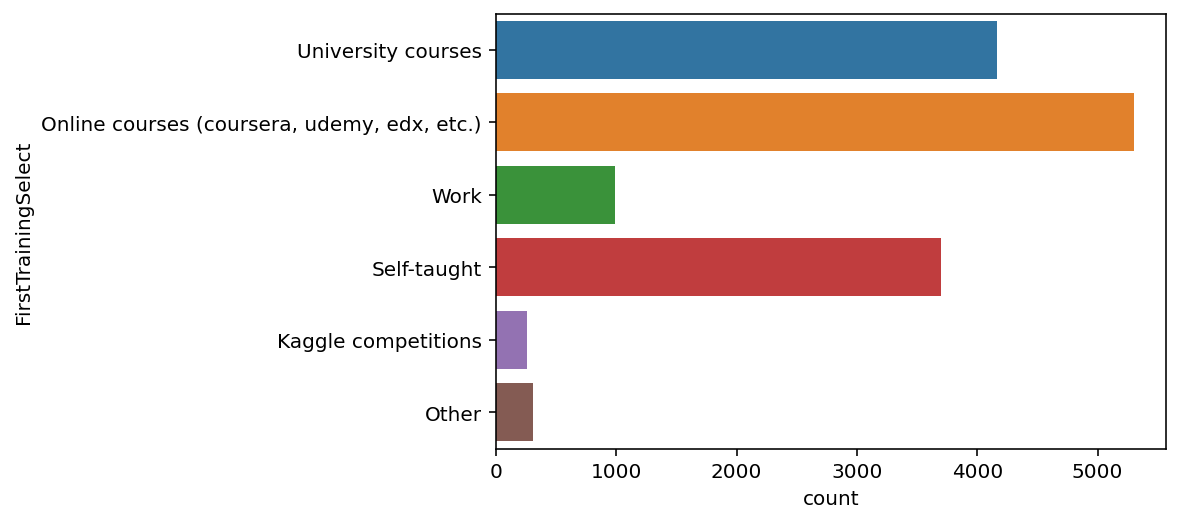

In [117]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

대부분의 응답자가 학사학위 이상으로 대학교육에 대한 중요성을 부여했지만, 가장 많은 응답자가 코세라, 유데미와 같은 온라인 코스를 통해 데이터 사이언스를 공부했고 그 다음으로 대학교육이 차지하고 있다.</br>
개인 프로젝트를 해보는 것도 중요하다고 답한 응답자가 제법 있다.

# Q14 데이터 사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

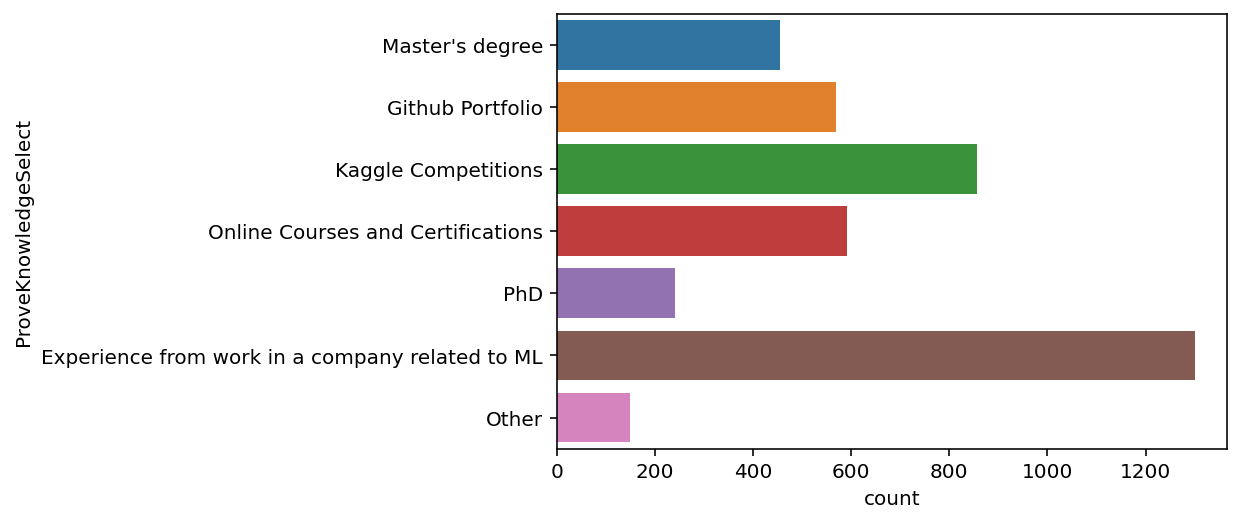

In [118]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

머신러닝 관련된 직무경험이 가장 중요하고 다음으로 캐글 경진대회의 결과가 중요하다고 응답했다. 그리고 온라인 강좌의 수료증이나 깃허브 포트폴리오 순으로 중요하다고 답했다.

# Q15 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [119]:
# 설문 내용과 누구에게 물어봤는지 알아보기

qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [120]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

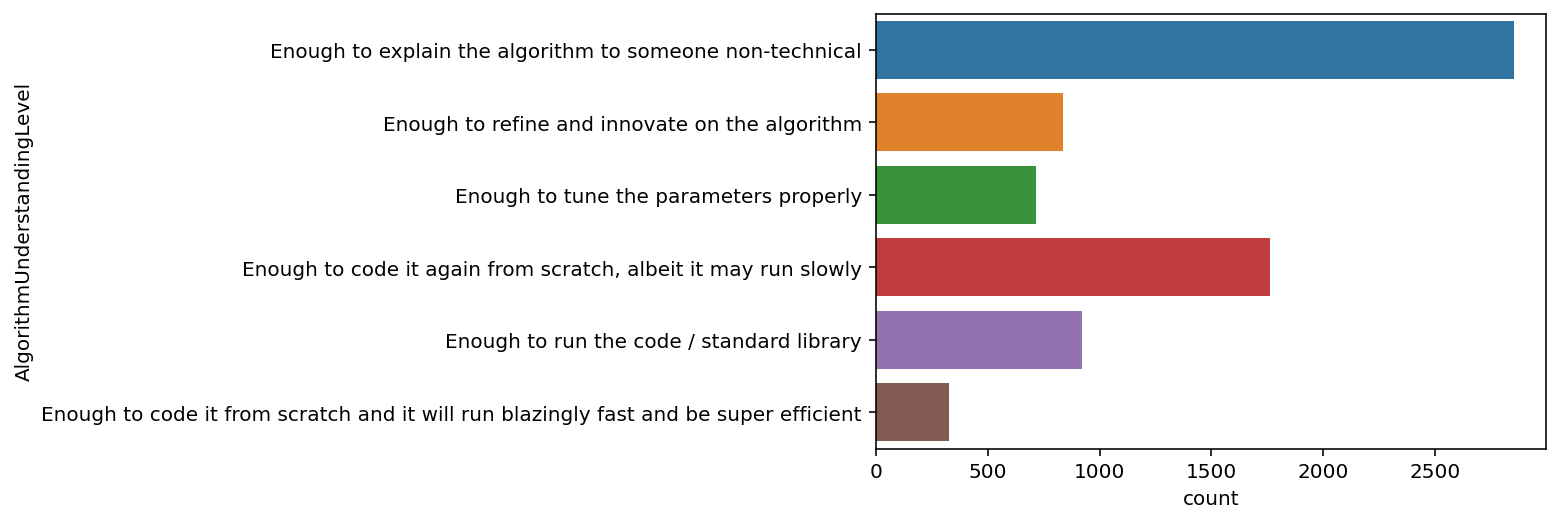

In [121]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

현재 코딩업무를 하는 사람들에게 질문했으며, 기술과 관련없는 사람에게 설명할 수 있는 정도면 충분하다는 응답이 가장 많음, 좀 더디더라도 밑바닥부터 다시 코딩해볼 수 있는 게 중요하다는 응답이 뒤를 이음

#Q16 어디에서 일을 찾아야 할까요?

In [124]:
# 설문 내용과 누구에게 물어봤는지를 찾아보기

question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


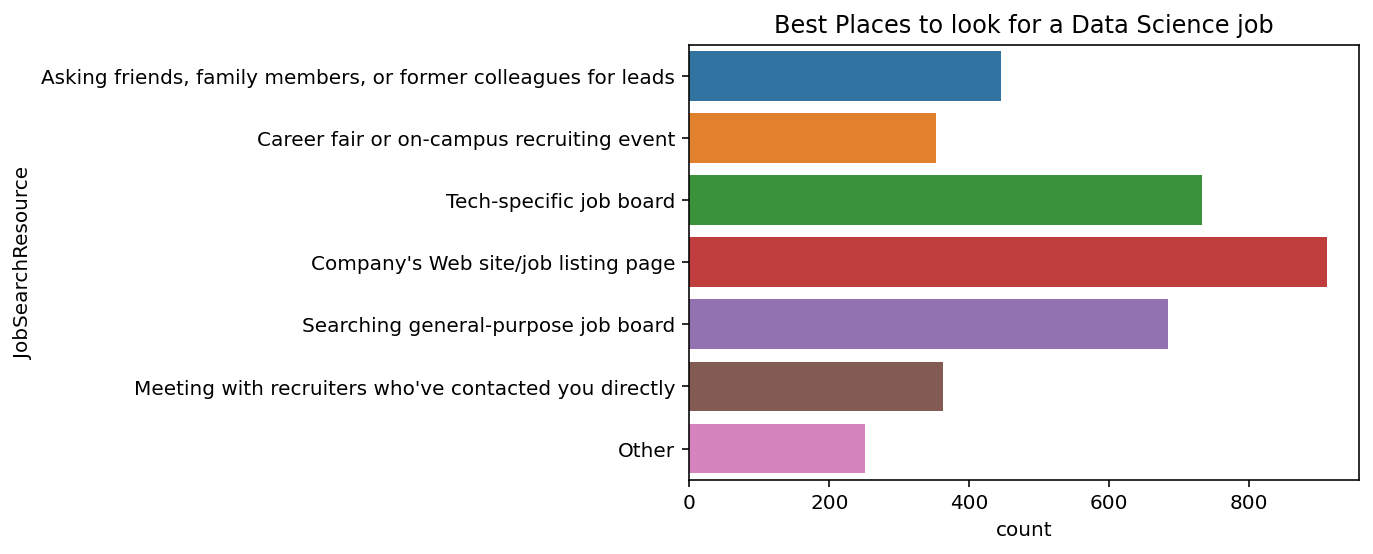

In [125]:
plt.title('Best Places to look for a Data Science job')
sns.countplot(y='JobSearchResource', data=mcq)

구직자들은 회사 웹사이트나 구직 사이트로부터 찾고 그 다음으로 특정 기술의 채용 게시판, 일반 채용 게시판, 친구나 가족, 이전 직장 동료나 리더를 통해 채용 정보를 얻는다.

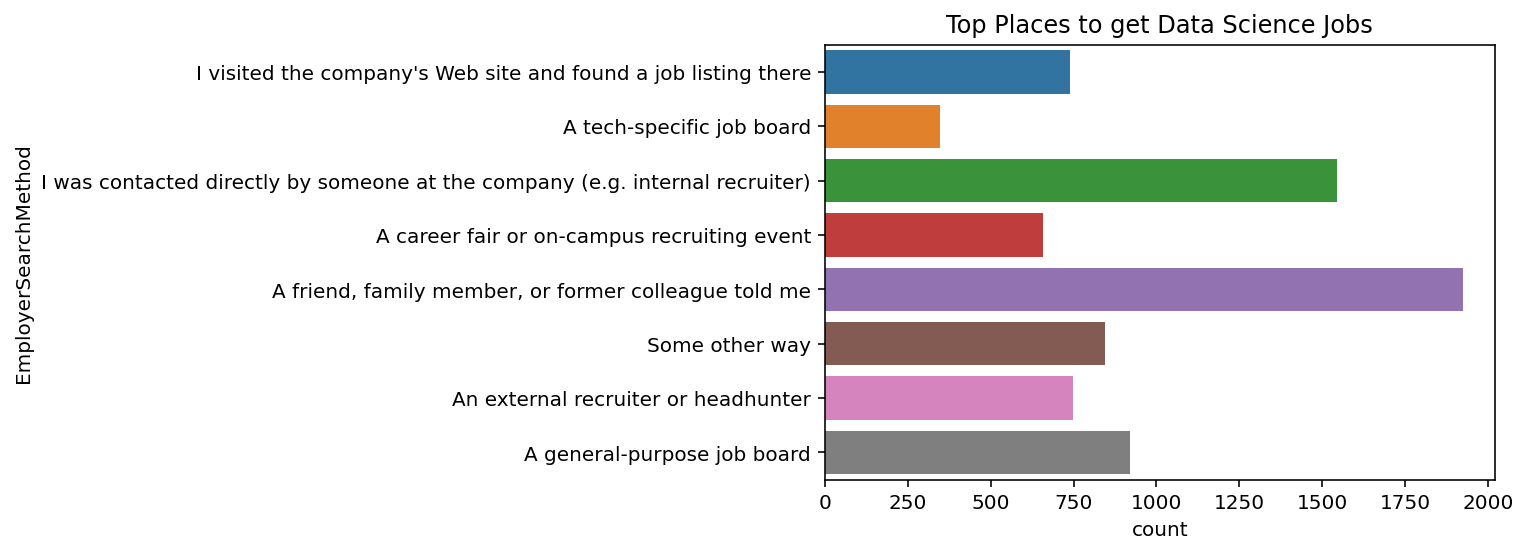

In [126]:
plt.title('Top Places to get Data Science Jobs')
sns.countplot(y='EmployerSearchMethod', data=mcq)

채용자는 친구, 가족, 전 직장 동료 등의 추천을 통해 가장 많은 사람을 구하며 다음으로 리쿠르터나 특정 회사에 소속된 사람에게 직접 연락을 하여 구하는 비율이 높다.